 # 1. primera metodologia

### 1.0 crear datos sinteticos

In [71]:
import pandas as pd
import numpy as np

#paso 0: parametros
n_activos = 5
periodos=200 # este es T
n_portafolios = 10

# Paso 1: Crear el DataFrame de retornos (5 activos)
fechas = pd.date_range('1974-01-01', periods=periodos, freq='B')  # 20 días hábiles
np.random.seed(42)
data = np.random.rand(periodos, n_activos)  # Generación de retornos aleatorios
df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
df


,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5
1974-01-01,0.374540,0.950714,0.731994,0.598658,0.156019
1974-01-02,0.155995,0.058084,0.866176,0.601115,0.708073
1974-01-03,0.020584,0.969910,0.832443,0.212339,0.181825
1974-01-04,0.183405,0.304242,0.524756,0.431945,0.291229
1974-01-07,0.611853,0.139494,0.292145,0.366362,0.456070
...,...,...,...,...,...
1974-10-01,0.262264,0.595078,0.051426,0.496366,0.596843
1974-10-02,0.334244,0.770912,0.106598,0.075138,0.728189
1974-10-03,0.495491,0.688402,0.434827,0.246402,0.819102
1974-10-04,0.799416,0.694696,0.272145,0.590231,0.360974


In [72]:
df.mean()

Activo_1    0.492004
Activo_2    0.515033
Activo_3    0.480239
Activo_4    0.508214
Activo_5    0.455793
dtype: float64

In [73]:
# Paso 2: Crear portafolios con pesos aleatorios para 48 portafolios (48 combinaciones)
  # Número de portafolios
pesos = np.random.rand(n_portafolios, n_activos)  # 48 portafolios, 5 activos
pesos = pesos / pesos.sum(axis=1)[:, np.newaxis]  # Normalizamos para que sumen 1

# Multiplicamos los retornos por los pesos para obtener los portafolios
portafolios = np.dot(df.values, pesos.T)

# Paso 3: Crear un DataFrame para los portafolios con los valores calculados
df_portafolios = pd.DataFrame(portafolios, index=fechas, columns=[f'Portafolio_{i+1}' for i in range(n_portafolios)])
df_portafolios


,Portafolio_1,Portafolio_2,Portafolio_3,Portafolio_4,Portafolio_5,Portafolio_6,Portafolio_7,Portafolio_8,Portafolio_9,Portafolio_10
1974-01-01,0.569560,0.596163,0.637202,0.566983,0.508337,0.581507,0.785528,0.561621,0.537852,0.563425
1974-01-02,0.582310,0.467844,0.494453,0.465504,0.568285,0.490961,0.345584,0.475663,0.446006,0.379027
1974-01-03,0.496442,0.521856,0.650476,0.330716,0.378186,0.530932,0.763713,0.475590,0.423107,0.253635
1974-01-04,0.384891,0.349548,0.365424,0.353763,0.364560,0.351975,0.361410,0.341564,0.327495,0.327930
1974-01-07,0.344084,0.361446,0.305444,0.422426,0.397619,0.346092,0.237821,0.398264,0.369169,0.422145
...,...,...,...,...,...,...,...,...,...,...
1974-10-01,0.401674,0.355331,0.391655,0.325556,0.378922,0.400714,0.454499,0.300132,0.464397,0.422752
1974-10-02,0.387107,0.414906,0.501299,0.229687,0.344621,0.462828,0.529461,0.376594,0.479641,0.265731
1974-10-03,0.536974,0.556126,0.616879,0.412893,0.512437,0.586762,0.585936,0.545618,0.579017,0.401198
1974-10-04,0.473228,0.531648,0.482362,0.599370,0.503240,0.509295,0.570648,0.533421,0.555730,0.669868


In [286]:
pesos 

array([[0.05898272, 0.17264778, 0.27811755, 0.23328434, 0.25696761],
       [0.22412564, 0.23552041, 0.28890607, 0.08493991, 0.16650797],
       [0.07633337, 0.34081742, 0.32576925, 0.01360512, 0.24347484],
       [0.35271699, 0.06883773, 0.21650829, 0.34899634, 0.01294066],
       [0.18188083, 0.0775459 , 0.24107408, 0.25324312, 0.24625607],
       [0.14245706, 0.25896326, 0.25370817, 0.09585987, 0.24901164],
       [0.03488632, 0.56209112, 0.21682451, 0.11365588, 0.07254217],
       [0.32512897, 0.15870311, 0.33842664, 0.03051785, 0.14722343],
       [0.17067993, 0.25016266, 0.10084436, 0.1980145 , 0.28029854],
       [0.34901172, 0.13201891, 0.013828  , 0.49308792, 0.01205345]])

In [287]:
df_portafolios.mean()

Portafolio_1     0.487184
Portafolio_2     0.489376
Portafolio_3     0.487424
Portafolio_4     0.496231
Portafolio_5     0.486141
Portafolio_6     0.487520
Portafolio_7     0.501613
Portafolio_8     0.486841
Portafolio_9     0.489638
Portafolio_10    0.502438
dtype: float64

## 1.1 Ortogonalización

In [288]:

# Paso 4: Calcular la matriz de covarianzas con una ventana móvil
ventana = 10  # Tamaño de la ventana móvil (ajustado para que funcione con los 20 días)
cov_matrices = []
for i in range(ventana, len(df_portafolios)):
    ventana_datos = df_portafolios.iloc[i-ventana:i]
    cov_matrices.append(ventana_datos.cov().values)



In [289]:
import numpy as np
import pandas as pd

# Lista para almacenar los portafolios dinámicos
portafolios_dinamicos = []

for t, cov in enumerate(cov_matrices):
    cov_matrix = cov

    # Paso 5: Descomponer la matriz de covarianzas (autovalores y autovectores)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Paso 6: Ordenar los autovalores y autovectores en orden descendente
    idx = eigenvalues.argsort()[::-1]  # Índices ordenados
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Paso 7: Normalizar los eigenvectores seleccionados
    eigenvectors_normalized = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

    # Paso 8: Crear portafolios ortogonales a partir de los eigenvectores normalizados
    df_ortogonales = pd.DataFrame(
        np.dot(df_portafolios.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )
    
    # Paso 9: Determinar dinámicamente el número de eigenportafolios principales (l)
    mediana_eigenvalores = np.median(eigenvalues)  # Calcular la mediana de los eigenvalores
    l = sum(eigenvalues > mediana_eigenvalores)  # Contar cuántos eigenvalores superan la mediana

    # Paso 10: Seleccionar los primeros l portafolios ortogonales
    df_ortogonales_l = df_ortogonales.iloc[:, :l]
    portafolios_dinamicos.append(df_ortogonales_l)

    # Mostrar los pesos de los portafolios principales
    #print(f"Número de eigenportafolios seleccionados dinámicamente l={l} en t={t}")
print(f"Pesos de los portafolios principales (autovectores normalizados):")
print(eigenvectors_normalized[:, :l])  # Los pesos de los primeros 'l' portafolios ortogonales

# Mostrar los primeros l portafolios ortogonales
print(df_ortogonales_l.head())



Pesos de los portafolios principales (autovectores normalizados):
[[-0.24670363  0.04541556  0.55013618 -0.14188093  0.47082683]
 [-0.29995471 -0.27989824 -0.02305833 -0.02716826 -0.18833547]
 [-0.19184276 -0.44675289  0.12680052  0.02665279  0.14528325]
 [-0.49176252  0.26018699 -0.07681127 -0.44110793 -0.10538966]
 [-0.297354    0.12915697  0.48823437  0.02360373  0.06834407]
 [-0.22152276 -0.23932651  0.14541035  0.2412388  -0.00703534]
 [-0.23541851 -0.36303975 -0.54054565 -0.04178857  0.60993925]
 [-0.35065865 -0.36779545 -0.03747561 -0.14055175 -0.57358688]
 [-0.19888073  0.00404009  0.04174095  0.81528248 -0.06162294]
 [-0.46379071  0.55790914 -0.34639119  0.19724403  0.03304616]]
            portafolio_ortogonal_1  portafolio_ortogonal_2  \
1974-01-02               -1.750516               -0.526889   
1974-01-03               -1.398149               -0.335528   
1974-01-04               -1.344843               -0.715259   
1974-01-07               -1.052326               -0.261

In [290]:
print(eigenvectors_normalized[:, :])

[[-0.24670363  0.04541556  0.55013618 -0.14188093  0.47082683 -0.10560094
  -0.13639611  0.15709693 -0.07939532  0.5760888 ]
 [-0.29995471 -0.27989824 -0.02305833 -0.02716826 -0.18833547  0.67471698
   0.39406481 -0.2501953   0.00645956  0.34896218]
 [-0.19184276 -0.44675289  0.12680052  0.02665279  0.14528325 -0.43919081
   0.67255827  0.15072514  0.03806237 -0.23732308]
 [-0.49176252  0.26018699 -0.07681127 -0.44110793 -0.10538966 -0.0923956
  -0.04487351 -0.02148806  0.67529225 -0.108891  ]
 [-0.297354    0.12915697  0.48823437  0.02360373  0.06834407  0.38115168
  -0.09235222  0.07068464 -0.24260705 -0.65851211]
 [-0.22152276 -0.23932651  0.14541035  0.2412388  -0.00703534 -0.29057621
  -0.28553281 -0.80354131  0.01157739 -0.04984444]
 [-0.23541851 -0.36303975 -0.54054565 -0.04178857  0.60993925  0.17498103
  -0.29163232  0.10554545 -0.03914888 -0.13593468]
 [-0.35065865 -0.36779545 -0.03747561 -0.14055175 -0.57358688 -0.18493437
  -0.35503345  0.34492136 -0.32226497  0.09235243]
 

In [291]:
# siempre es l=5, en esencia no cambia

## ahora que :( o sea tengo 79 matrices en portafolios dinamicos, se supone que cada uno es una realizacion de la verdadera distribucion??

In [292]:
len(portafolios_dinamicos)

190

#### crear matriz de retornos

In [293]:

import pandas as pd

# Crear una lista vacía para almacenar las filas
filas = []

# Supongamos que portafolios_dinamicos es una lista de DataFrames
for i in range(len(portafolios_dinamicos)):
    # Tomamos la fila correspondiente, incrementando el índice con el valor de 'i'
    fila = portafolios_dinamicos[i].iloc[ventana-1 + i]  # Ajustamos el índice de la fila
    filas.append(fila)

# Convertir la lista de filas en un DataFrame
resultado_df = pd.DataFrame(filas)

# Mostrar el DataFrame resultante
resultado_df



,portafolio_ortogonal_1,portafolio_ortogonal_2,portafolio_ortogonal_3,portafolio_ortogonal_4,portafolio_ortogonal_5
1974-01-15,-0.840585,1.154997,0.019402,0.089442,0.056130
1974-01-16,-2.658950,-0.173074,-0.072532,-0.046690,0.039680
1974-01-17,-0.954103,-0.214125,-0.175584,-0.012968,-0.052757
1974-01-18,-1.385554,-0.102858,-0.062266,-0.042974,0.045912
1974-01-21,-1.585035,0.233509,-0.013578,-0.199670,0.010867
...,...,...,...,...,...
1974-10-01,-1.719060,-0.334115,0.110871,-0.033702,-0.180452
1974-10-02,-1.182480,0.063212,0.053248,-0.189034,-0.318345
1974-10-03,-1.066944,-0.462911,-0.212980,-0.529515,0.058706
1974-10-04,-1.548367,-0.531481,0.184941,0.349106,0.238267


In [294]:
resultado_df.mean()

portafolio_ortogonal_1   -1.517966
portafolio_ortogonal_2    0.048432
portafolio_ortogonal_3   -0.001421
portafolio_ortogonal_4    0.023751
portafolio_ortogonal_5   -0.011272
dtype: float64

### matriz de retornos binarios

In [295]:
## matriz de 1's y 0's
#t=1,2,3,..185
resultado_df_binario= resultado_df.apply(lambda row: row == row.max(), axis=1).astype(int)
resultado_df_binario

,portafolio_ortogonal_1,portafolio_ortogonal_2,portafolio_ortogonal_3,portafolio_ortogonal_4,portafolio_ortogonal_5
1974-01-15,0,1,0,0,0
1974-01-16,0,0,0,0,1
1974-01-17,0,0,0,1,0
1974-01-18,0,0,0,0,1
1974-01-21,0,1,0,0,0
...,...,...,...,...,...
1974-10-01,0,0,1,0,0
1974-10-02,0,1,0,0,0
1974-10-03,0,0,0,0,1
1974-10-04,0,0,0,1,0


In [296]:
resultado_df_binario.mean()

portafolio_ortogonal_1    0.000000
portafolio_ortogonal_2    0.373684
portafolio_ortogonal_3    0.221053
portafolio_ortogonal_4    0.268421
portafolio_ortogonal_5    0.136842
dtype: float64

In [297]:
resultado_df.cov()

,portafolio_ortogonal_1,portafolio_ortogonal_2,portafolio_ortogonal_3,portafolio_ortogonal_4,portafolio_ortogonal_5
portafolio_ortogonal_1,0.189231,0.010359,-0.004508,-0.001907,0.000793
portafolio_ortogonal_2,0.010359,0.123906,0.000676,0.001945,-0.003413
portafolio_ortogonal_3,-0.004508,0.000676,0.027027,0.002326,-0.001652
portafolio_ortogonal_4,-0.001907,0.001945,0.002326,0.022089,0.002502
portafolio_ortogonal_5,0.000793,-0.003413,-0.001652,0.002502,0.011322


In [298]:
resultado_df.corr()

,portafolio_ortogonal_1,portafolio_ortogonal_2,portafolio_ortogonal_3,portafolio_ortogonal_4,portafolio_ortogonal_5
portafolio_ortogonal_1,1.000000,0.067653,-0.063032,-0.029504,0.017135
portafolio_ortogonal_2,0.067653,1.000000,0.011677,0.037176,-0.091118
portafolio_ortogonal_3,-0.063032,0.011677,1.000000,0.095216,-0.094430
portafolio_ortogonal_4,-0.029504,0.037176,0.095216,1.000000,0.158195
portafolio_ortogonal_5,0.017135,-0.091118,-0.094430,0.158195,1.000000


## 1.2 ADTS

### 1.2.1 ADTS sin ortogonalizar

In [299]:
# sin ortogonalizar
import numpy as np
from scipy.stats import beta
import pandas as pd

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario= returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # 
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        
        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K):
            if k == I_t:
                alpha[k] = gamma * alpha[k] + X_t
                beta_params[k] = gamma * beta_params[k] + (1 - X_t)
            else:
                alpha[k] = gamma*alpha[k]
                beta_params[k] = gamma*beta_params[k]
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = df_portafolios

# Parámetros del algoritmo
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

# Resultados
print("Portafolios seleccionados cada día:", actions)
#print("Retornos observados:", observed_rewards)
print("eventos:", eventos)
numero_de_unos = eventos.count(1)
print(" numero aciertos:", numero_de_unos)

Portafolios seleccionados cada día: [2, 9, 6, 4, 6, 6, 7, 2, 0, 8, 8, 5, 9, 7, 7, 3, 0, 7, 9, 7, 4, 7, 2, 0, 8, 9, 6, 4, 3, 2, 3, 8, 8, 9, 1, 7, 8, 0, 3, 2, 5, 6, 0, 6, 5, 2, 0, 3, 9, 1, 2, 9, 7, 6, 6, 3, 9, 3, 8, 7, 4, 8, 0, 3, 7, 9, 7, 6, 2, 4, 8, 7, 6, 5, 4, 2, 8, 6, 9, 0, 1, 9, 9, 2, 9, 8, 9, 6, 9, 7, 9, 6, 5, 9, 3, 4, 2, 7, 2, 9, 9, 9, 0, 9, 1, 6, 5, 7, 9, 6, 4, 4, 9, 9, 1, 8, 4, 3, 3, 6, 0, 6, 9, 8, 4, 0, 6, 2, 7, 8, 6, 2, 6, 6, 6, 6, 4, 6, 6, 9, 6, 6, 5, 6, 3, 0, 9, 7, 6, 7, 7, 7, 7, 9, 3, 2, 7, 4, 7, 5, 0, 8, 6, 2, 1, 6, 3, 4, 8, 6, 3, 7, 9, 4, 2, 1, 5, 6, 8, 3, 4, 0, 3, 6, 7, 2, 9, 3, 1, 7, 0, 6, 3, 7, 9, 6, 5, 9, 6, 8]
eventos: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [300]:
## pendiente aleatoria 

### 1.2.2 ADTS solo actualizando el arma que se dispara con ortogonalizacion

In [301]:
import numpy as np
from scipy.stats import beta
import pandas as pd

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario=  returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K):
            if k == I_t:
                alpha[k] = gamma * alpha[k] + X_t
                beta_params[k] = gamma * beta_params[k] + (1 - X_t)
            else:
                alpha[k] = gamma*alpha[k]
                beta_params[k] = gamma*beta_params[k]
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = resultado_df

# Parámetros del algoritmo
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

# Resultados
print("Portafolios seleccionados cada día:", actions)
#print("Retornos observados:", observed_rewards)
print("eventos:", eventos)
numero_de_unos = eventos.count(1)
print(" numero aciertos:", numero_de_unos)

Portafolios seleccionados cada día: [1, 0, 2, 4, 1, 1, 4, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 2, 1, 1, 4, 1, 2, 3, 0, 3, 4, 2, 3, 3, 3, 2, 4, 3, 1, 1, 4, 2, 4, 2, 2, 0, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 2, 2, 2, 2, 2, 2, 0, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 3, 1, 1, 0, 1, 4, 3, 3, 3, 3, 2, 4, 2, 3, 0, 2, 4, 3, 3, 0, 1, 1, 1, 1, 4, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 1, 4, 1, 0, 4, 1, 4, 4, 4, 3, 4, 2, 4, 1, 4, 4]
eventos: [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

### 1.2.3 ADTS actualizando todas las armas(disparadas y no disparadas)

In [302]:
#pesos fijos y lo que elijo es un portafolio dado
import numpy as np
from scipy.stats import beta
import pandas as pd

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario=  returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)
        

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K): #acá actualizó tanto el que disparo como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] =  gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = resultado_df

# Parámetros del algoritmo
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

# Resultados
print("Portafolios seleccionados cada día:", actions)
#print("Retornos observados:", observed_rewards)
print("eventos:", eventos)
numero_de_unos = eventos.count(1)
print(" numero aciertos:", numero_de_unos)

Portafolios seleccionados cada día: [3, 4, 1, 4, 1, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
eventos: [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

### 1.3 Evaluar convergencia suponiendo que portafolio 1 =activo 1, portafolio 2= activo 2 y asi

In [117]:
import pandas as pd
import numpy as np

# Paso 0: parámetros
n_activos = 44  # Número de activos
periodos = 1825  # Este es T: Número de días (365 días hábiles en un año) 4 AÑOS
incremento = 1  # Incremento no utilizado, pero lo incluyo para referencia
ventana_adts = 121  # Cada cuántos días cambia la media

# Generar fechas para todo un año con días hábiles
fechas = pd.date_range('1974-01-01', periods=periodos)  # 'B' es para días hábiles

# Inicializar matrices para los retornos y para las medias verdaderas
np.random.seed(42)  # Para reproducibilidad de los datos
data = np.zeros((periodos, n_activos))  # Matriz de retornos simulados
medias_reales = np.zeros((periodos, n_activos))  # Matriz para almacenar las medias verdaderas

# Función para asignar una media aleatoria
def media_aleatoria():
    return np.random.choice([1, 1.5, 2, 2.2, 2.6 , 0.5, 3.4, 1.5, 2, 2.2, 2.5, 3])

# Generar los retornos con medias dinámicas y registrar las medias reales
desplazamientos = np.random.uniform(-1, 1, n_activos)  # Crear desplazamientos aleatorios para cada activo

# Generación de los datos
for t in range(periodos):
    # Cambiar la media cada ventana_adts días
    if t % ventana_adts == 0:
        base_media = media_aleatoria()  # Asignar una nueva media aleatoria en cada bloque de 121 días
    
    # Aleatorizar los desplazamientos, generando nuevas variaciones para cada activo
    desplazamientos = np.random.uniform(0, 10, n_activos)  # Nuevos desplazamientos aleatorios
    
    # Ajustar la media con un desplazamiento aleatorio para cada activo
    medias_actuales = base_media + desplazamientos  # Cada activo tiene una media ajustada
    
    # Generar los retornos con una distribución normal centrada en la media actual
    data[t, :] = np.random.normal(loc=medias_actuales, scale=1, size=n_activos)
    
    # Registrar las medias verdaderas para cada activo
    medias_reales[t, :] = medias_actuales

# Crear DataFrames de los retornos y las medias reales
df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
df_medias = pd.DataFrame(medias_reales, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])

# Aplicar el escalado solicitado: df = df / (df + 1)
df = df / (df + 1)

# Restablecer la opción de mostrar filas (por si es necesario)
pd.reset_option('display.max_rows')



In [118]:
df

,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5,Activo_6,Activo_7,Activo_8,Activo_9,Activo_10,...,Activo_35,Activo_36,Activo_37,Activo_38,Activo_39,Activo_40,Activo_41,Activo_42,Activo_43,Activo_44
1974-01-01,0.664197,0.915420,0.846574,0.835082,0.878966,0.739991,0.902364,0.865170,0.858990,0.925527,...,0.898351,0.909911,0.926716,0.867395,0.692034,0.835819,0.893677,0.892350,0.857578,0.861322
1974-01-02,0.825213,0.837015,0.801711,0.896272,0.903248,0.802318,0.924473,0.843000,0.921992,0.866506,...,0.915502,0.807261,0.759055,0.923187,0.857850,0.891888,0.922345,0.883902,0.912298,0.824100
1974-01-03,0.797813,0.875995,0.864121,0.922396,0.589475,0.930298,0.875765,0.837041,0.919286,0.886323,...,0.875749,0.830557,0.859494,0.806130,0.885921,0.804410,0.813605,0.888648,0.792460,0.774471
1974-01-04,0.739935,0.909148,0.880823,0.896532,0.907443,0.878749,0.915084,0.925557,0.920031,0.863199,...,0.920703,0.586047,0.872204,0.912389,0.888512,0.862021,0.859982,0.900286,0.903406,0.842213
1974-01-05,0.822299,0.896827,0.795459,0.806377,0.861518,0.754704,0.888639,0.865268,0.899633,0.904474,...,0.837923,0.898990,0.921188,0.924707,0.735240,0.851172,0.819593,0.845322,0.828587,0.890100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-26,0.810461,0.919090,0.897542,0.649995,0.812922,0.866540,0.913320,0.789604,0.926203,0.778017,...,0.841341,0.925271,0.901835,0.863857,0.919434,0.865244,0.905028,0.900052,0.899875,0.910496
1978-12-27,0.909676,0.881089,0.841844,0.806115,0.917652,0.900224,0.798284,0.891434,0.841659,0.920478,...,0.922677,0.908994,0.880879,0.914174,0.879831,0.921473,0.913607,0.879494,0.708616,0.833559
1978-12-28,0.852947,0.916198,0.914677,0.935866,0.915098,0.856204,0.862897,0.852304,0.879004,0.872026,...,0.799262,0.857003,0.920584,0.863094,0.876067,0.825080,0.717205,0.864324,0.922676,0.885981
1978-12-29,0.907702,0.925172,0.887066,0.873434,0.913347,0.931640,0.901074,0.806660,0.917246,0.927382,...,0.867950,0.805703,0.917879,0.858418,0.915683,0.915486,0.905561,0.906724,0.848842,0.857517


In [119]:
print("\nMedias reales:")
df_medias


Medias reales:


,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5,Activo_6,Activo_7,Activo_8,Activo_9,Activo_10,...,Activo_35,Activo_36,Activo_37,Activo_38,Activo_39,Activo_40,Activo_41,Activo_42,Activo_43,Activo_44
1974-01-01,4.022361,9.753614,6.451559,4.279417,7.877003,2.513133,10.622848,6.697541,6.151502,11.466589,...,8.710770,11.349597,10.700386,6.694507,3.154101,5.908183,8.888413,8.859224,8.112978,4.947218
1974-01-02,2.848922,4.739154,4.668761,9.163043,9.322706,3.680869,12.177405,4.867810,11.966150,6.310370,...,10.295010,5.686660,3.161766,11.605233,6.175720,7.377514,10.577101,8.956901,9.552161,4.290716
1974-01-03,4.501853,7.191934,7.920042,9.885540,2.636038,12.145505,6.899445,4.995603,11.034940,9.677188,...,7.728200,5.165101,6.397809,4.762069,8.315137,3.015942,2.251849,8.478944,4.142740,2.909409
1974-01-04,2.353045,11.534363,7.210399,7.593774,9.039638,8.358512,11.638916,11.642516,10.871989,8.564036,...,11.566482,2.591863,6.379460,11.875806,7.679719,6.434709,7.885203,7.959246,9.516478,3.476897
1974-01-05,5.979876,9.250844,4.687242,5.502525,6.544518,4.736822,6.252021,7.914730,9.609739,9.871949,...,6.042018,9.571007,11.352543,11.787024,2.778639,6.145218,3.267561,5.556601,3.896799,8.668484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-26,4.791196,12.426624,9.978082,3.443257,4.044502,5.196994,9.848038,4.959351,11.137799,3.891419,...,5.580070,11.428258,9.574635,6.557213,11.276297,7.328771,9.098454,9.066834,7.236288,10.721269
1978-12-27,9.561817,7.728819,5.650327,3.106147,10.882674,7.685599,4.418062,7.612525,5.756307,11.342148,...,12.996889,9.368137,6.916554,10.109827,9.068267,12.484867,10.226970,8.131282,3.482416,5.153119
1978-12-28,5.445574,11.651310,10.987469,12.885721,10.304268,6.993373,6.176365,7.661505,8.232354,8.503796,...,3.453401,7.835191,10.486551,7.756306,6.751808,3.426187,3.968300,6.445028,11.655662,6.518801
1978-12-29,10.890306,11.931569,8.585300,7.661307,9.425814,12.880076,8.176554,4.760312,11.788953,12.593667,...,6.990694,4.302429,9.449115,5.917894,12.226988,9.395090,9.742310,8.397639,5.812830,3.127311


#####  medias realizadas por bloques

In [120]:
# verificar las medias
# Calcular las medias de cada columna por bloques de 10 periodos
medias_por_bloque = df.groupby((np.arange(len(df)) // ventana_adts)).mean()

# Renombrar los índices de los bloques para mayor claridad
medias_por_bloque.index = [f'Bloque_{i+1}' for i in range(len(medias_por_bloque))]

# Mostrar las medias por bloque
medias_por_bloque


,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5,Activo_6,Activo_7,Activo_8,Activo_9,Activo_10,...,Activo_35,Activo_36,Activo_37,Activo_38,Activo_39,Activo_40,Activo_41,Activo_42,Activo_43,Activo_44
Bloque_1,0.849557,0.852883,0.855633,0.851334,0.859051,0.849996,0.867674,0.847416,0.863122,0.856812,...,0.847111,0.857882,0.863221,0.856459,0.858522,0.858673,0.859008,0.856412,0.864666,0.865101
Bloque_2,0.828473,0.842356,0.843907,0.846922,0.856751,0.854483,0.844423,0.851113,0.852605,0.852224,...,0.853483,0.854656,0.845865,0.849390,0.853670,0.842849,0.851658,0.854315,0.840262,0.841844
Bloque_3,0.863168,0.861574,0.859784,0.862777,0.857615,0.866801,0.854347,0.862964,0.851232,0.855215,...,0.862998,0.863999,0.852295,0.858904,0.856415,0.851612,0.872793,0.863233,0.860991,0.859471
Bloque_4,0.881934,0.878856,0.884605,0.878907,0.877386,0.884763,0.864226,0.874807,0.881912,0.880601,...,0.878024,0.886897,0.877084,0.875112,0.872810,0.874796,0.879182,0.879528,0.882562,0.873449
Bloque_5,0.822890,0.803587,0.836104,0.784975,0.827047,-1.231177,0.810421,0.826873,0.790467,0.802223,...,0.796199,0.795808,0.794537,0.800919,0.809451,0.816583,0.981795,0.830819,0.811132,0.799755
Bloque_6,0.835748,0.852231,0.844304,0.843277,0.855354,0.848169,0.854389,0.855759,0.848907,0.847779,...,0.856344,0.839349,0.839541,0.855716,0.850655,0.860485,0.852944,0.853112,0.864684,0.849661
Bloque_7,0.852789,0.844417,0.857064,0.834683,0.835451,0.843984,0.852836,0.839542,0.852136,0.848443,...,0.853274,0.842215,0.833683,0.859050,0.863993,0.832485,0.847443,0.845786,0.842777,0.854111
Bloque_8,0.827272,0.838745,0.836747,0.815835,0.745012,0.852799,0.833709,0.852384,0.804216,0.832610,...,0.823718,0.828769,0.756533,0.819892,0.841370,0.790198,0.834634,0.839567,0.824746,0.823708
Bloque_9,0.816309,0.733409,0.841278,0.842359,0.837657,0.830964,0.830063,0.834635,0.835637,0.826113,...,0.829431,0.826880,0.775136,0.821676,0.827773,0.832217,0.847354,0.808559,0.842744,0.879790
Bloque_10,0.872261,0.877271,0.879733,0.869180,0.858584,0.865915,0.871726,0.867664,0.864869,0.878354,...,0.872537,0.876819,0.864535,0.867127,0.874343,0.873224,0.856226,0.864033,0.870788,0.867477


In [121]:
# verificar las medias
# Calcular las medias de cada columna por bloques de 10 periodos
medias_por_bloque = df_medias.groupby((np.arange(len(df_medias)) // ventana_adts)).mean()

# Renombrar los índices de los bloques para mayor claridad
medias_por_bloque.index = [f'Bloque_{i+1}' for i in range(len(medias_por_bloque))]

# Mostrar las medias por bloque
medias_por_bloque

,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5,Activo_6,Activo_7,Activo_8,Activo_9,Activo_10,...,Activo_35,Activo_36,Activo_37,Activo_38,Activo_39,Activo_40,Activo_41,Activo_42,Activo_43,Activo_44
Bloque_1,7.031371,7.077949,7.039351,7.479176,7.417881,6.992095,7.409158,7.047412,7.819578,7.839232,...,7.251866,7.043044,7.400798,7.588727,7.468087,7.056339,7.251783,7.404057,7.735692,7.618831
Bloque_2,7.407541,6.743584,6.827234,6.947563,7.207377,7.376624,7.030282,7.061525,7.191299,7.147817,...,7.241226,7.164675,6.900792,6.955423,7.133065,7.429259,7.045917,7.191980,6.750962,6.937706
Bloque_3,7.617012,7.489711,7.492014,7.732471,7.421397,7.507001,7.148717,7.335533,7.586306,7.726240,...,7.550763,7.604072,7.048723,7.479125,7.178380,7.082843,7.914691,7.626128,7.415382,7.527176
Bloque_4,8.666749,8.422713,8.926713,8.544138,8.443610,8.716772,7.821938,7.996650,8.639308,8.679798,...,8.454060,8.661262,8.257501,8.157470,7.952793,8.008955,8.362085,8.432088,8.576114,8.166633
Bloque_5,6.346953,6.087863,6.668166,6.081876,6.342504,5.884480,6.251664,6.162651,6.005274,6.093269,...,5.939332,5.982537,5.966078,6.051076,6.017099,6.205609,6.068832,6.242111,5.866599,5.926459
Bloque_6,6.678954,7.179582,7.056140,7.186016,7.228805,7.197756,7.346075,7.147017,6.719821,7.199062,...,6.949108,7.089513,7.332166,7.406412,6.828492,7.450638,7.153987,6.858256,7.599545,7.377717
Bloque_7,6.984663,7.271655,7.135272,6.768031,6.602692,6.922148,7.161066,6.686340,7.172776,7.099793,...,7.195387,6.866954,6.621327,7.528546,7.375944,6.471287,6.878524,6.888638,6.788547,6.828529
Bloque_8,6.420026,6.843886,6.969379,6.154217,6.212409,6.983228,6.880437,6.998395,5.898566,6.477112,...,6.562986,6.644046,6.497953,6.216270,6.807013,6.334297,6.423456,6.606849,6.129809,6.054896
Bloque_9,6.210730,6.716674,6.679851,6.656711,6.546160,6.539496,6.451592,6.481302,6.572524,6.410215,...,6.534666,6.270813,6.576007,6.207337,6.713443,6.494985,6.697509,6.583737,6.823706,6.770078
Bloque_10,7.935777,8.307828,8.315224,7.858223,7.402478,7.801821,7.871581,7.704719,7.708307,8.482268,...,7.840233,8.201073,7.857266,7.626541,8.153603,7.950911,7.409734,7.565487,7.985943,7.793043


In [122]:
# los portafolios iniciales son 1 o 0 de todo

#### ortogonalizacion

In [125]:
df_portafolios=df
## 
ventana = 121  # Tamaño de la ventana móvil (ajustado para que funcione con los 20 días)
cov_matrices = []
for i in range(ventana, len(df_portafolios)):
    ventana_datos = df_portafolios.iloc[i-ventana:i]
    cov_matrices.append(ventana_datos.cov().values)
import numpy as np
import pandas as pd

# Lista para almacenar los portafolios dinámicos
portafolios_dinamicos = []
portafolios_dinamicos_verdad = []

for t, cov in enumerate(cov_matrices):
    cov_matrix = cov

    # Paso 5: Descomponer la matriz de covarianzas (autovalores y autovectores)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Paso 6: Ordenar los autovalores y autovectores en orden descendente
    idx = eigenvalues.argsort()[::-1]  # Índices ordenados
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors.astype(float)

    eigenvectors_normalized = []
    # Paso 7: Normalizar los eigenvectores seleccionados
    for i in range(eigenvectors.shape[1]):
        col_sum = np.sum(np.abs(eigenvectors[:, i]))
        eigenvectors[:, i] = np.abs(eigenvectors[:, i] / col_sum)

    # Paso 7: Normalizar los eigenvectores seleccionados
    eigenvectors_normalized = eigenvectors
    
    # Paso 8: Crear portafolios ortogonales a partir de los eigenvectores normalizados
    df_ortogonales = pd.DataFrame(
        np.dot(df_portafolios.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )
    
    df_ortogonales_verdad = pd.DataFrame(
        np.dot(df_medias.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_verdad{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )
    
    # Paso 9: Determinar dinámicamente el número de eigenportafolios principales (l)
    mediana_eigenvalores = np.median(eigenvalues)  # Calcular la mediana de los eigenvalores
    l = sum(eigenvalues > mediana_eigenvalores)  # Contar cuántos eigenvalores superan la mediana

    # Paso 10: Seleccionar los primeros l portafolios ortogonales
    df_ortogonales_l = df_ortogonales.iloc[:, :l]
    df_ortogonales_verdad_l = df_ortogonales_verdad.iloc[:, :l]
    portafolios_dinamicos.append(df_ortogonales_l)
    portafolios_dinamicos_verdad.append(df_ortogonales_verdad_l)

    # Mostrar los pesos de los portafolios principales
    #print(f"Número de eigenportafolios seleccionados dinámicamente l={l} en t={t}")

# Mostrar los pesos de los portafolios principales (autovectores normalizados)
print("Pesos de los portafolios principales (autovectores normalizados):")
print(eigenvectors_normalized[:, :l])  # Pesos de los primeros 'l' portafolios ortogonales


Pesos de los portafolios principales (autovectores normalizados):
[[2.58473295e-03 1.00371718e-02 5.27040621e-02 8.09341225e-03
  2.90219314e-02 3.15940501e-04 1.96731661e-02 2.83969949e-02
  1.75369321e-02 2.15651770e-02 6.31406404e-02 3.82531348e-04
  2.05645584e-02 1.17978240e-02 1.26166058e-01 1.36245972e-02
  1.89374307e-02 2.07525826e-02 1.05464864e-02 2.90851983e-02
  5.00911647e-02 5.54621566e-03]
 [9.18592180e-04 2.05746820e-02 4.78889286e-02 1.06339136e-01
  1.11527045e-01 1.20649448e-01 2.66217454e-02 9.66844143e-02
  4.81892385e-02 9.44981379e-03 3.94271669e-02 1.32577173e-02
  1.04153194e-02 2.04157798e-02 3.71435283e-02 2.14590362e-03
  2.49731892e-03 1.49965510e-02 6.72764007e-03 2.07993496e-02
  1.46781256e-02 7.47112245e-03]
 [2.88409876e-03 6.94679988e-03 6.91303123e-02 2.63521915e-01
  3.48118314e-02 7.81820019e-02 3.47321877e-02 1.07616943e-02
  1.52143114e-02 7.94227279e-03 1.14217703e-02 4.74506822e-03
  5.01323737e-03 2.48136996e-02 1.13476360e-02 1.87776866e-03


#### crear matriz de retornos

In [126]:
import pandas as pd

# Crear una lista vacía para almacenar las filas
filas = []
filas_verdad=[]

# Supongamos que portafolios_dinamicos es una lista de DataFrames
for i in range(len(portafolios_dinamicos)):
    # Tomamos la fila correspondiente, incrementando el índice con el valor de 'i'
    fila = portafolios_dinamicos[i].iloc[ventana-1 + i]  # Ajustamos el índice de la fila
    filas.append(fila)
    fila_verdad=  portafolios_dinamicos_verdad[i].iloc[ventana-1 + i]
    filas_verdad.append(fila_verdad)
    

# Convertir la lista de filas en un DataFrame
resultado_df = pd.DataFrame(filas)
resultado_df_verdad=pd.DataFrame(filas_verdad)

# Mostrar el DataFrame resultante
resultado_df



,portafolio_ortogonal_1,portafolio_ortogonal_2,portafolio_ortogonal_3,portafolio_ortogonal_4,portafolio_ortogonal_5,portafolio_ortogonal_6,portafolio_ortogonal_7,portafolio_ortogonal_8,portafolio_ortogonal_9,portafolio_ortogonal_10,...,portafolio_ortogonal_13,portafolio_ortogonal_14,portafolio_ortogonal_15,portafolio_ortogonal_16,portafolio_ortogonal_17,portafolio_ortogonal_18,portafolio_ortogonal_19,portafolio_ortogonal_20,portafolio_ortogonal_21,portafolio_ortogonal_22
1974-05-01,0.874636,0.871586,0.865462,0.871224,0.853826,0.851588,0.865031,0.870630,0.860592,0.866802,...,0.868349,0.850927,0.871486,0.853946,0.877883,0.858446,0.859924,0.853855,0.856211,0.857407
1974-05-02,0.870016,0.852330,0.815046,0.829739,0.805252,0.829856,0.806648,0.846108,0.862128,0.832182,...,0.834102,0.846414,0.838996,0.852542,0.853807,0.848364,0.837354,0.857145,0.851111,0.853379
1974-05-03,0.864913,0.835518,0.856501,0.836397,0.858622,0.845544,0.849489,0.840435,0.836125,0.857203,...,0.852906,0.850473,0.828930,0.842123,0.830237,0.845904,0.855281,0.851338,0.835074,0.843867
1974-05-04,0.817858,0.870129,0.846266,0.851886,0.856353,0.842391,0.819947,0.843110,0.866098,0.830361,...,0.834741,0.839148,0.855617,0.862052,0.857619,0.847154,0.856341,0.849919,0.838122,0.859731
1974-05-05,0.870492,0.857645,0.856589,0.856519,0.844575,0.847214,0.834866,0.862940,0.847512,0.834835,...,0.848517,0.831215,0.840721,0.857074,0.843299,0.854781,0.855497,0.847753,0.857993,0.854507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-25,0.865656,0.904405,0.914046,0.902203,0.902709,0.897714,0.893220,0.886300,0.888860,0.890814,...,0.881731,0.885963,0.873942,0.877003,0.870045,0.888140,0.884248,0.888915,0.888816,0.888022
1978-12-26,0.894086,0.846161,0.847473,0.859761,0.848998,0.850975,0.879134,0.883549,0.888093,0.877288,...,0.843382,0.876336,0.863662,0.867316,0.870900,0.872419,0.884010,0.861274,0.872293,0.853354
1978-12-27,0.879552,0.896201,0.868854,0.873607,0.892048,0.885976,0.877742,0.888409,0.881184,0.870496,...,0.875685,0.880271,0.880871,0.867501,0.871656,0.871034,0.868617,0.883993,0.875236,0.874399
1978-12-28,0.865394,0.895846,0.893654,0.888082,0.863078,0.865718,0.860739,0.859037,0.866364,0.862816,...,0.855022,0.874331,0.862367,0.863105,0.871553,0.872433,0.868199,0.862505,0.878647,0.877254


In [127]:
resultado_df_verdad

,portafolio_ortogonal_verdad1,portafolio_ortogonal_verdad2,portafolio_ortogonal_verdad3,portafolio_ortogonal_verdad4,portafolio_ortogonal_verdad5,portafolio_ortogonal_verdad6,portafolio_ortogonal_verdad7,portafolio_ortogonal_verdad8,portafolio_ortogonal_verdad9,portafolio_ortogonal_verdad10,...,portafolio_ortogonal_verdad13,portafolio_ortogonal_verdad14,portafolio_ortogonal_verdad15,portafolio_ortogonal_verdad16,portafolio_ortogonal_verdad17,portafolio_ortogonal_verdad18,portafolio_ortogonal_verdad19,portafolio_ortogonal_verdad20,portafolio_ortogonal_verdad21,portafolio_ortogonal_verdad22
1974-05-01,8.356763,8.067288,7.436666,8.187163,7.497093,7.009850,7.614908,7.825746,7.715265,7.830260,...,8.005217,7.381601,8.039469,7.552738,8.238561,7.619836,7.358083,6.971901,7.040030,7.321288
1974-05-02,8.065976,6.584092,6.681117,6.446012,6.592056,6.615379,6.093835,7.037856,6.861055,6.805966,...,6.395585,6.737419,6.715531,6.903399,7.039115,6.334572,6.579081,7.249986,6.594466,6.968291
1974-05-03,8.365902,6.367225,7.307089,6.293627,7.361579,6.848887,6.992520,7.055266,6.852612,7.399722,...,7.422091,6.971938,6.726567,7.254085,6.608663,7.079051,7.303568,7.451664,6.939016,7.224036
1974-05-04,6.072670,8.053049,7.438398,7.374972,7.570204,7.220355,6.591883,7.453956,7.651644,7.015557,...,6.974324,6.963369,7.734795,7.904732,7.952388,7.658868,7.801013,7.389821,7.055715,7.712808
1974-05-05,7.288087,7.278828,7.058009,7.252970,6.624738,6.579151,6.421232,7.446671,6.853981,6.630474,...,6.775880,6.014716,6.386722,7.600258,6.750670,6.863789,7.202085,7.123338,7.114250,7.219612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-25,5.333353,9.480050,11.075634,9.184236,10.020106,9.739554,9.061985,8.296053,8.004696,8.486959,...,8.219516,8.528926,8.393939,8.065432,8.188800,8.830939,8.789583,8.657296,8.947734,8.737416
1978-12-26,8.757252,6.724971,5.883061,7.956149,6.855188,6.883529,8.605085,8.895086,8.860926,8.197094,...,7.177548,8.064884,7.492552,7.499292,7.520631,7.883033,8.501108,7.788498,7.743608,7.688293
1978-12-27,8.176653,7.770804,7.441897,7.749554,8.549802,8.640315,7.830022,8.726709,8.637471,7.812235,...,7.909720,8.575583,8.224618,7.893192,7.830491,7.659046,7.488073,8.459184,8.377927,7.832435
1978-12-28,6.689601,9.666466,9.521774,9.302955,7.987461,7.708671,7.393247,7.564851,7.681896,8.004143,...,7.501705,8.371814,7.424641,7.423634,7.931478,8.044735,7.725616,7.753701,8.191813,8.262897


In [128]:
#pesos fijos y lo que elijo es un portafolio dado
import numpy as np
from scipy.stats import beta
import pandas as pd

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario=  returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)
        

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K): #acá actualizó tanto el que disparo como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] =  gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = resultado_df

# Parámetros del algoritmo
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

# Resultados
print("Portafolios seleccionados cada día:", actions)
#print("Retornos observados:", observed_rewards)
print("eventos:", eventos)
numero_de_unos = eventos.count(1)
print(" numero aciertos:", numero_de_unos)

Portafolios seleccionados cada día: [21, 13, 18, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### comparacion

In [129]:
resultado_df_verdad

,portafolio_ortogonal_verdad1,portafolio_ortogonal_verdad2,portafolio_ortogonal_verdad3,portafolio_ortogonal_verdad4,portafolio_ortogonal_verdad5,portafolio_ortogonal_verdad6,portafolio_ortogonal_verdad7,portafolio_ortogonal_verdad8,portafolio_ortogonal_verdad9,portafolio_ortogonal_verdad10,...,portafolio_ortogonal_verdad13,portafolio_ortogonal_verdad14,portafolio_ortogonal_verdad15,portafolio_ortogonal_verdad16,portafolio_ortogonal_verdad17,portafolio_ortogonal_verdad18,portafolio_ortogonal_verdad19,portafolio_ortogonal_verdad20,portafolio_ortogonal_verdad21,portafolio_ortogonal_verdad22
1974-05-01,8.356763,8.067288,7.436666,8.187163,7.497093,7.009850,7.614908,7.825746,7.715265,7.830260,...,8.005217,7.381601,8.039469,7.552738,8.238561,7.619836,7.358083,6.971901,7.040030,7.321288
1974-05-02,8.065976,6.584092,6.681117,6.446012,6.592056,6.615379,6.093835,7.037856,6.861055,6.805966,...,6.395585,6.737419,6.715531,6.903399,7.039115,6.334572,6.579081,7.249986,6.594466,6.968291
1974-05-03,8.365902,6.367225,7.307089,6.293627,7.361579,6.848887,6.992520,7.055266,6.852612,7.399722,...,7.422091,6.971938,6.726567,7.254085,6.608663,7.079051,7.303568,7.451664,6.939016,7.224036
1974-05-04,6.072670,8.053049,7.438398,7.374972,7.570204,7.220355,6.591883,7.453956,7.651644,7.015557,...,6.974324,6.963369,7.734795,7.904732,7.952388,7.658868,7.801013,7.389821,7.055715,7.712808
1974-05-05,7.288087,7.278828,7.058009,7.252970,6.624738,6.579151,6.421232,7.446671,6.853981,6.630474,...,6.775880,6.014716,6.386722,7.600258,6.750670,6.863789,7.202085,7.123338,7.114250,7.219612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-25,5.333353,9.480050,11.075634,9.184236,10.020106,9.739554,9.061985,8.296053,8.004696,8.486959,...,8.219516,8.528926,8.393939,8.065432,8.188800,8.830939,8.789583,8.657296,8.947734,8.737416
1978-12-26,8.757252,6.724971,5.883061,7.956149,6.855188,6.883529,8.605085,8.895086,8.860926,8.197094,...,7.177548,8.064884,7.492552,7.499292,7.520631,7.883033,8.501108,7.788498,7.743608,7.688293
1978-12-27,8.176653,7.770804,7.441897,7.749554,8.549802,8.640315,7.830022,8.726709,8.637471,7.812235,...,7.909720,8.575583,8.224618,7.893192,7.830491,7.659046,7.488073,8.459184,8.377927,7.832435
1978-12-28,6.689601,9.666466,9.521774,9.302955,7.987461,7.708671,7.393247,7.564851,7.681896,8.004143,...,7.501705,8.371814,7.424641,7.423634,7.931478,8.044735,7.725616,7.753701,8.191813,8.262897


In [130]:
resultado_df

,portafolio_ortogonal_1,portafolio_ortogonal_2,portafolio_ortogonal_3,portafolio_ortogonal_4,portafolio_ortogonal_5,portafolio_ortogonal_6,portafolio_ortogonal_7,portafolio_ortogonal_8,portafolio_ortogonal_9,portafolio_ortogonal_10,...,portafolio_ortogonal_13,portafolio_ortogonal_14,portafolio_ortogonal_15,portafolio_ortogonal_16,portafolio_ortogonal_17,portafolio_ortogonal_18,portafolio_ortogonal_19,portafolio_ortogonal_20,portafolio_ortogonal_21,portafolio_ortogonal_22
1974-05-01,0.874636,0.871586,0.865462,0.871224,0.853826,0.851588,0.865031,0.870630,0.860592,0.866802,...,0.868349,0.850927,0.871486,0.853946,0.877883,0.858446,0.859924,0.853855,0.856211,0.857407
1974-05-02,0.870016,0.852330,0.815046,0.829739,0.805252,0.829856,0.806648,0.846108,0.862128,0.832182,...,0.834102,0.846414,0.838996,0.852542,0.853807,0.848364,0.837354,0.857145,0.851111,0.853379
1974-05-03,0.864913,0.835518,0.856501,0.836397,0.858622,0.845544,0.849489,0.840435,0.836125,0.857203,...,0.852906,0.850473,0.828930,0.842123,0.830237,0.845904,0.855281,0.851338,0.835074,0.843867
1974-05-04,0.817858,0.870129,0.846266,0.851886,0.856353,0.842391,0.819947,0.843110,0.866098,0.830361,...,0.834741,0.839148,0.855617,0.862052,0.857619,0.847154,0.856341,0.849919,0.838122,0.859731
1974-05-05,0.870492,0.857645,0.856589,0.856519,0.844575,0.847214,0.834866,0.862940,0.847512,0.834835,...,0.848517,0.831215,0.840721,0.857074,0.843299,0.854781,0.855497,0.847753,0.857993,0.854507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-25,0.865656,0.904405,0.914046,0.902203,0.902709,0.897714,0.893220,0.886300,0.888860,0.890814,...,0.881731,0.885963,0.873942,0.877003,0.870045,0.888140,0.884248,0.888915,0.888816,0.888022
1978-12-26,0.894086,0.846161,0.847473,0.859761,0.848998,0.850975,0.879134,0.883549,0.888093,0.877288,...,0.843382,0.876336,0.863662,0.867316,0.870900,0.872419,0.884010,0.861274,0.872293,0.853354
1978-12-27,0.879552,0.896201,0.868854,0.873607,0.892048,0.885976,0.877742,0.888409,0.881184,0.870496,...,0.875685,0.880271,0.880871,0.867501,0.871656,0.871034,0.868617,0.883993,0.875236,0.874399
1978-12-28,0.865394,0.895846,0.893654,0.888082,0.863078,0.865718,0.860739,0.859037,0.866364,0.862816,...,0.855022,0.874331,0.862367,0.863105,0.871553,0.872433,0.868199,0.862505,0.878647,0.877254


### regrets

In [131]:
regrets = []

# Suponiendo que tienes un DataFrame como 'resultado_df_verdad' y una lista 'actions'
for x in range(len(resultado_df_verdad)):
    action_tomada = actions[x]
    
    # Obtener la recompensa obtenida de la columna correspondiente a la acción tomada
    reward_obtenido = resultado_df_verdad.loc[resultado_df_verdad.index[x], resultado_df_verdad.columns[action_tomada]]
    
    # Seleccionar todas las columnas que contienen 'portafolio_ortogonal_verdad' en su nombre
    columnas_interes = [col for col in resultado_df_verdad.columns if 'portafolio_ortogonal_verdad' in col]
    
    # Calcular el máximo entre las columnas seleccionadas para esa fila
    maximo_reward = resultado_df_verdad.loc[resultado_df_verdad.index[x], columnas_interes].max()
    
    # Calcular el regret (diferencia entre el máximo reward y el reward obtenido)
    regret = maximo_reward - reward_obtenido
    regrets.append(regret)

# Mostrar los regrets calculados
regrets


[1.035474719692571,
 1.328557509904015,
 1.0623335463100902,
 0.9973339640195391,
 0.3121710792249175,
 1.1680621130446855,
 1.2121123128557905,
 0.0,
 1.1798554231815785,
 2.226630524752262,
 1.8867894653025754,
 2.0047895283964445,
 0.9096289083749287,
 0.8671627131708926,
 0.0,
 0.3320620137145127,
 4.716923830908536,
 1.0707874531157051,
 1.581152227497892,
 0.0,
 0.8759795754275927,
 0.40439607797547694,
 0.0,
 0.7314971130166841,
 1.0972190042694194,
 0.0,
 0.0,
 0.0,
 0.9246557419802324,
 0.0,
 0.46651355051275,
 0.0,
 0.0,
 0.0,
 1.960613379926758,
 1.4888413741417468,
 0.0,
 1.0669102676040145,
 1.7759030622627305,
 0.0,
 0.0,
 0.0,
 0.0,
 2.552297448640532,
 1.0816781948124268,
 0.3551445482205695,
 0.0,
 0.0,
 1.3876412470746597,
 0.0,
 0.0,
 1.0588568035180295,
 1.1955752159556159,
 1.2825323430493407,
 0.0,
 0.0,
 0.5871574901772378,
 0.0,
 0.0,
 0.4977960903239751,
 0.09298487576806203,
 0.32988881113984725,
 0.9817376287108157,
 1.15895901073874,
 0.0,
 0.932181786102874

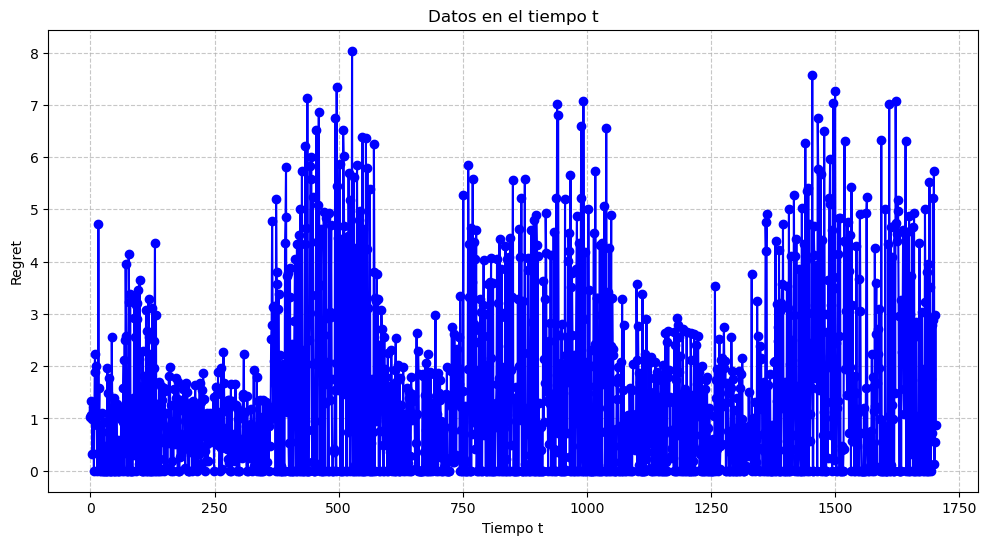

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets)), regrets, marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

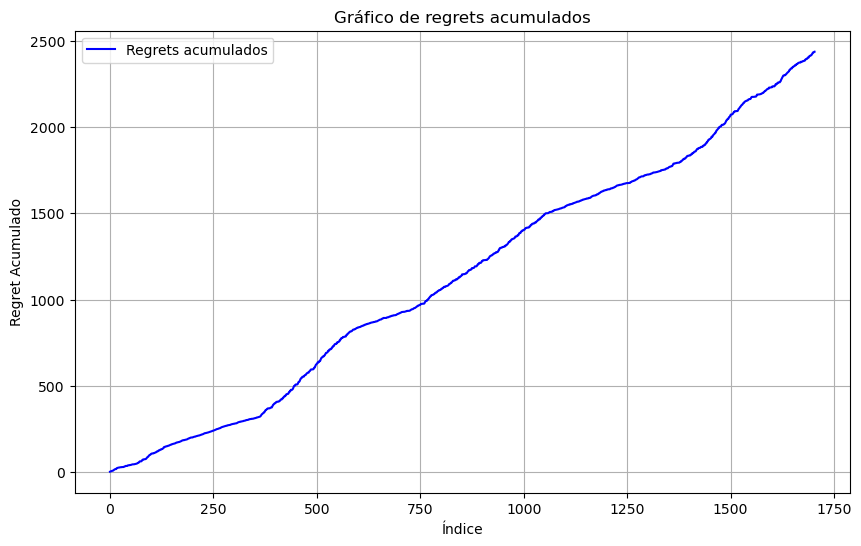

In [133]:
# Calcular el acumulado
regrets_acumulado = np.cumsum(regrets)

# Graficar el acumulado
plt.figure(figsize=(10, 6))
plt.plot(regrets_acumulado, label="Regrets acumulados", color='b')
plt.title("Gráfico de regrets acumulados")
plt.xlabel("Índice")
plt.ylabel("Regret Acumulado")
plt.grid(True)
plt.legend()
plt.show()

In [134]:
regrets_acumulado

array([1.03547472e+00, 2.36403223e+00, 3.42636578e+00, ...,
       2.43412392e+03, 2.43710079e+03, 2.43797625e+03])

In [135]:
ventana

121

In [136]:
len(regrets)

1704

In [137]:
regrets_promedios = [np.mean(regrets[i::ventana-1]) for i in range(ventana-1)]


In [138]:
regrets_promedios

[1.1757326538513873,
 1.5330397298234961,
 1.7511653936257583,
 1.3556677888749182,
 1.766453294989645,
 1.1803179501364454,
 1.9862528993350066,
 1.3078153703162623,
 1.0308499179877393,
 1.3747111500875373,
 1.9998740077775785,
 1.337429988673852,
 1.30569805991678,
 1.197501911085405,
 2.022343997304728,
 0.8879368757605176,
 1.5214880234731492,
 1.6011716662848865,
 1.8015406654191284,
 1.786745529609686,
 1.759429365497243,
 1.181907763576478,
 1.4594847236426163,
 1.732880975760571,
 1.0547735967986518,
 2.1893854115656404,
 1.2071894095521625,
 1.1765916367230165,
 1.6349117488280807,
 1.9205403329048967,
 1.2654178244208443,
 1.5656011405238854,
 1.1848506489728448,
 1.9720107502125759,
 1.4921591725910393,
 0.95474560645053,
 0.8038840736783553,
 1.1241336026883768,
 1.4786236963776445,
 0.6799354621105896,
 1.539514551179756,
 2.1584706602231107,
 1.8524416059150468,
 1.2128451351715694,
 0.6479847775980553,
 0.6694299464377024,
 1.2008801787544006,
 1.7218930014283929,
 1.58

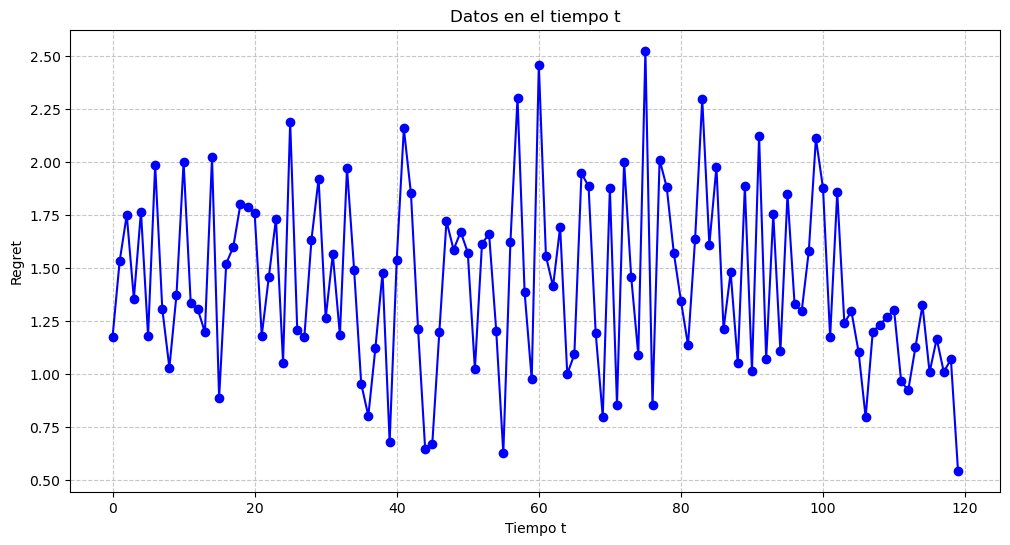

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedios)), regrets_promedios, marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [32]:
### pendiente ana 7 dic 7.25 pm hacer los regrets promedios de las observaciones de loss dias (hacer grupitos de los dias 1's en cada ventana, los dias 2's en cada ventana, los dias 3's en cada ventana y asi)

In [323]:
### de la metodologia 1 me falta 1. evaluar la convergencia, 2. pensar como meto todas las realizaciones

In [ ]:
### markowitz : sacar la matriz de varianza y covarianza de los portafolios y la media esperada

In [ ]:
## pendientes: 
#1. la convergencias - distribuciones teoricas - ana 
#2. markowitz
#3. combinatorial - camilo
# 4. graficas medias

### 8 dic 

In [2]:
import pandas as pd
import numpy as np

# Paso 0: parámetros
n_activos = 44  # Número de activos
periodos = 1825  # Este es T: Número de días (365 días hábiles en un año) 4 AÑOS
incremento = 1  # Incremento no utilizado, pero lo incluyo para referencia
ventana_adts = 121  # Cada cuántos días cambia la media

# Generar fechas para todo un año con días hábiles
fechas = pd.date_range('1974-01-01', periods=periodos)  # 'B' es para días hábiles

# Inicializar matrices para los retornos y para las medias verdaderas
np.random.seed(42)  # Para reproducibilidad de los datos
data = np.zeros((periodos, n_activos))  # Matriz de retornos simulados
medias_reales = np.zeros((periodos, n_activos))  # Matriz para almacenar las medias verdaderas

# Función para asignar una media aleatoria
def media_aleatoria():
    return np.random.choice([1, 1.5, 2, 2.2, 2.6 , 0.5, 3.4, 1.5, 2, 2.2, 2.5, 3])

# Generar los retornos con medias dinámicas y registrar las medias reales
desplazamientos = np.random.uniform(-1, 1, n_activos)  # Crear desplazamientos aleatorios para cada activo

# Generación de los datos
for t in range(periodos):
    # Cambiar la media cada ventana_adts días
    if t % ventana_adts == 0:
        base_media = media_aleatoria()  # Asignar una nueva media aleatoria en cada bloque de 121 días
    
    # Aleatorizar los desplazamientos, generando nuevas variaciones para cada activo
    desplazamientos = np.random.uniform(0, 10, n_activos)  # Nuevos desplazamientos aleatorios
    
    # Ajustar la media con un desplazamiento aleatorio para cada activo
    medias_actuales = base_media + desplazamientos  # Cada activo tiene una media ajustada
    
    # Generar los retornos con una distribución normal centrada en la media actual
    data[t, :] = np.random.normal(loc=medias_actuales, scale=1, size=n_activos)
    
    # Registrar las medias verdaderas para cada activo
    medias_reales[t, :] = medias_actuales

# Crear DataFrames de los retornos y las medias reales
df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
df_medias = pd.DataFrame(medias_reales, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])

# Aplicar el escalado solicitado: df = df / (df + 1)
df = df / (df + 1)

# Restablecer la opción de mostrar filas (por si es necesario)
pd.reset_option('display.max_rows')

df_portafolios=df
## 
ventana = 121  # Tamaño de la ventana móvil (ajustado para que funcione con los 20 días)
cov_matrices = []
for i in range(ventana, len(df_portafolios)):
    ventana_datos = df_portafolios.iloc[i-ventana:i]
    cov_matrices.append(ventana_datos.cov().values)


# Lista para almacenar los portafolios dinámicos
portafolios_dinamicos = []
portafolios_dinamicos_verdad = []

for t, cov in enumerate(cov_matrices):
    cov_matrix = cov

    # Paso 5: Descomponer la matriz de covarianzas (autovalores y autovectores)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Paso 6: Ordenar los autovalores y autovectores en orden descendente
    idx = eigenvalues.argsort()[::-1]  # Índices ordenados
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors.astype(float)

    eigenvectors_normalized = []
    # Paso 7: Normalizar los eigenvectores seleccionados
    for i in range(eigenvectors.shape[1]):
        col_sum = np.sum(np.abs(eigenvectors[:, i]))
        eigenvectors[:, i] = np.abs(eigenvectors[:, i] / col_sum)

    # Paso 7: Normalizar los eigenvectores seleccionados
    eigenvectors_normalized = eigenvectors
    
    # Paso 8: Crear portafolios ortogonales a partir de los eigenvectores normalizados
    df_ortogonales = pd.DataFrame(
        np.dot(df_portafolios.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )
    
    df_ortogonales_verdad = pd.DataFrame(
        np.dot(df_medias.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_verdad{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )
    
    # Paso 9: Determinar dinámicamente el número de eigenportafolios principales (l)
    mediana_eigenvalores = np.median(eigenvalues)  # Calcular la mediana de los eigenvalores
    l = sum(eigenvalues > mediana_eigenvalores)  # Contar cuántos eigenvalores superan la mediana

    # Paso 10: Seleccionar los primeros l portafolios ortogonales
    df_ortogonales_l = df_ortogonales.iloc[:, :l]
    df_ortogonales_verdad_l = df_ortogonales_verdad.iloc[:, :l]
    portafolios_dinamicos.append(df_ortogonales_l)
    portafolios_dinamicos_verdad.append(df_ortogonales_verdad_l)

    # Mostrar los pesos de los portafolios principales
    #print(f"Número de eigenportafolios seleccionados dinámicamente l={l} en t={t}")

# Mostrar los pesos de los portafolios principales (autovectores normalizados)
print("Pesos de los portafolios principales (autovectores normalizados):")
print(eigenvectors_normalized[:, :l])  # Pesos de los primeros 'l' portafolios ortogonales

# Crear una lista vacía para almacenar las filas
filas = []
filas_verdad=[]

# Supongamos que portafolios_dinamicos es una lista de DataFrames
for i in range(len(portafolios_dinamicos)):
    # Tomamos la fila correspondiente, incrementando el índice con el valor de 'i'
    fila = portafolios_dinamicos[i].iloc[ventana-1 + i]  # Ajustamos el índice de la fila
    filas.append(fila)
    fila_verdad=  portafolios_dinamicos_verdad[i].iloc[ventana-1 + i]
    filas_verdad.append(fila_verdad)
    

# Convertir la lista de filas en un DataFrame
resultado_df = pd.DataFrame(filas)
resultado_df_verdad=pd.DataFrame(filas_verdad)


import numpy as np
from scipy.stats import beta
import pandas as pd

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario=  returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)
        

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K): #acá actualizó tanto el que disparo como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] =  gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = resultado_df

# Parámetros del algoritmo
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

regrets = []

# Suponiendo que tienes un DataFrame como 'resultado_df_verdad' y una lista 'actions'
for x in range(len(resultado_df_verdad)):
    action_tomada = actions[x]
    
    # Obtener la recompensa obtenida de la columna correspondiente a la acción tomada
    reward_obtenido = resultado_df_verdad.loc[resultado_df_verdad.index[x], resultado_df_verdad.columns[action_tomada]]
    
    # Seleccionar todas las columnas que contienen 'portafolio_ortogonal_verdad' en su nombre
    columnas_interes = [col for col in resultado_df_verdad.columns if 'portafolio_ortogonal_verdad' in col]
    
    # Calcular el máximo entre las columnas seleccionadas para esa fila
    maximo_reward = resultado_df_verdad.loc[resultado_df_verdad.index[x], columnas_interes].max()
    
    # Calcular el regret (diferencia entre el máximo reward y el reward obtenido)
    regret = maximo_reward - reward_obtenido
    regrets.append(regret)

# Mostrar los regrets calculados
regrets


Pesos de los portafolios principales (autovectores normalizados):
[[2.58473295e-03 1.00371718e-02 5.27040621e-02 8.09341225e-03
  2.90219314e-02 3.15940501e-04 1.96731661e-02 2.83969949e-02
  1.75369321e-02 2.15651770e-02 6.31406404e-02 3.82531348e-04
  2.05645584e-02 1.17978240e-02 1.26166058e-01 1.36245972e-02
  1.89374307e-02 2.07525826e-02 1.05464864e-02 2.90851983e-02
  5.00911647e-02 5.54621566e-03]
 [9.18592180e-04 2.05746820e-02 4.78889286e-02 1.06339136e-01
  1.11527045e-01 1.20649448e-01 2.66217454e-02 9.66844143e-02
  4.81892385e-02 9.44981379e-03 3.94271669e-02 1.32577173e-02
  1.04153194e-02 2.04157798e-02 3.71435283e-02 2.14590362e-03
  2.49731892e-03 1.49965510e-02 6.72764007e-03 2.07993496e-02
  1.46781256e-02 7.47112245e-03]
 [2.88409876e-03 6.94679988e-03 6.91303123e-02 2.63521915e-01
  3.48118314e-02 7.81820019e-02 3.47321877e-02 1.07616943e-02
  1.52143114e-02 7.94227279e-03 1.14217703e-02 4.74506822e-03
  5.01323737e-03 2.48136996e-02 1.13476360e-02 1.87776866e-03


[1.035474719692571,
 1.328557509904015,
 1.0623335463100902,
 0.9973339640195391,
 0.3121710792249175,
 1.1680621130446855,
 1.2121123128557905,
 0.0,
 1.1798554231815785,
 2.226630524752262,
 1.8867894653025754,
 2.0047895283964445,
 0.9096289083749287,
 0.8671627131708926,
 0.0,
 0.3320620137145127,
 4.716923830908536,
 1.0707874531157051,
 1.581152227497892,
 0.0,
 0.8759795754275927,
 0.40439607797547694,
 0.0,
 0.7314971130166841,
 1.0972190042694194,
 0.0,
 0.0,
 0.0,
 0.9246557419802324,
 0.0,
 0.46651355051275,
 0.0,
 0.0,
 0.0,
 1.960613379926758,
 1.4888413741417468,
 0.0,
 1.0669102676040145,
 1.7759030622627305,
 0.0,
 0.0,
 0.0,
 0.0,
 2.552297448640532,
 1.0816781948124268,
 0.3551445482205695,
 0.0,
 0.0,
 1.3876412470746597,
 0.0,
 0.0,
 1.0588568035180295,
 1.1955752159556159,
 1.2825323430493407,
 0.0,
 0.0,
 0.5871574901772378,
 0.0,
 0.0,
 0.4977960903239751,
 0.09298487576806203,
 0.32988881113984725,
 0.9817376287108157,
 1.15895901073874,
 0.0,
 0.932181786102874

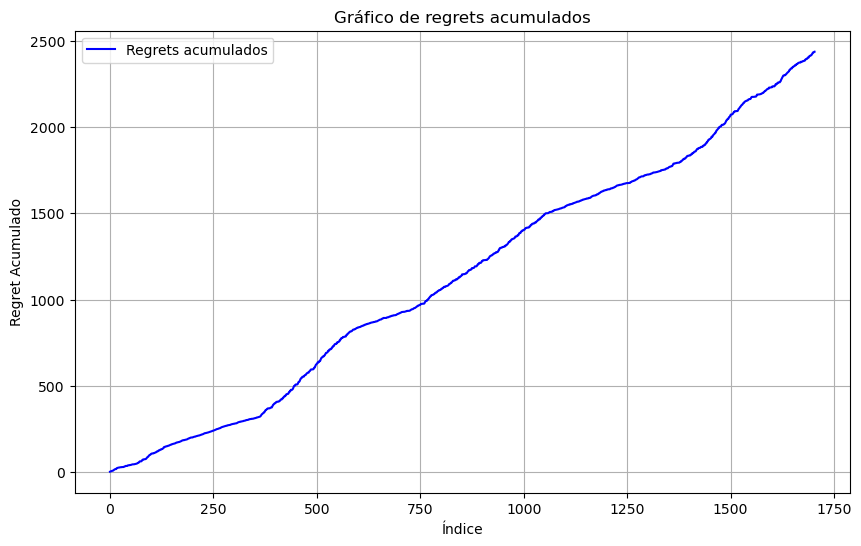

In [4]:
import matplotlib.pyplot as plt
# Calcular el acumulado
regrets_acumulado = np.cumsum(regrets)

# Graficar el acumulado
plt.figure(figsize=(10, 6))
plt.plot(regrets_acumulado, label="Regrets acumulados", color='b')
plt.title("Gráfico de regrets acumulados")
plt.xlabel("Índice")
plt.ylabel("Regret Acumulado")
plt.grid(True)
plt.legend()
plt.show()

In [34]:
import numpy as np
from scipy.stats import beta
import pandas as pd

# Definimos la función de Thompson Sampling Adaptado con Descuento
def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T). 

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario = returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos = []  # Almacenar los eventos (1 si la acción fue correcta)

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t = returns_binario.iloc[0:t, k]  # Retorna lo más que pueda
            else:
                ventana_reward_t = returns_binario.iloc[t-w:t, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero(ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values) - alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k]) / 2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderación
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K):  # Actualizo tanto el que disparó como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] = gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Definir las simulaciones
n_simulaciones = 30
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante
regrets_totales = []  # Lista para almacenar los regrets de todas las simulaciones

# Ejecutar 30 simulaciones
for sim in range(n_simulaciones):
    print(f"Simulación {sim + 1}/{n_simulaciones}")
    
        # Paso 0: parámetros
    n_activos = 44  # Número de activos
    periodos = 1825  # Este es T: Número de días (365 días hábiles en un año) 4 AÑOS
    incremento = 1  # Incremento no utilizado, pero lo incluyo para referencia
    ventana_adts = 121  # Cada cuántos días cambia la media

    # Generar fechas para todo un año con días hábiles
    fechas = pd.date_range('1974-01-01', periods=periodos)  # 'B' es para días hábiles

    # Inicializar matrices para los retornos y para las medias verdaderas
    #np.random.seed(42)  # Para reproducibilidad de los datos
    data = np.zeros((periodos, n_activos))  # Matriz de retornos simulados
    medias_reales = np.zeros((periodos, n_activos))  # Matriz para almacenar las medias verdaderas

    # Función para asignar una media aleatoria
    def media_aleatoria():
        return np.random.choice([1, 1.5, 2, 2.2, 2.6 , 0.5, 3.4, 1.5, 2, 2.2, 2.5, 3])

    # Generar los retornos con medias dinámicas y registrar las medias reales
    desplazamientos = np.random.uniform(-1, 1, n_activos)  # Crear desplazamientos aleatorios para cada activo

    # Generación de los datos
    for t in range(periodos):
        # Cambiar la media cada ventana_adts días
        if t % ventana_adts == 0:
            base_media = media_aleatoria()  # Asignar una nueva media aleatoria en cada bloque de 121 días

        # Aleatorizar los desplazamientos, generando nuevas variaciones para cada activo
        desplazamientos = np.random.uniform(0, 10, n_activos)  # Nuevos desplazamientos aleatorios

        # Ajustar la media con un desplazamiento aleatorio para cada activo
        medias_actuales = base_media + desplazamientos  # Cada activo tiene una media ajustada

        # Generar los retornos con una distribución normal centrada en la media actual
        data[t, :] = np.random.normal(loc=medias_actuales, scale=1, size=n_activos)

        # Registrar las medias verdaderas para cada activo
        medias_reales[t, :] = medias_actuales

    # Crear DataFrames de los retornos y las medias reales
    df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
    df_medias = pd.DataFrame(medias_reales, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])

    # Aplicar el escalado solicitado: df = df / (df + 1)
    df = df / (df + 1)

    # Restablecer la opción de mostrar filas (por si es necesario)
    pd.reset_option('display.max_rows')

    df_portafolios=df
    ## 
    ventana = 121  # Tamaño de la ventana móvil (ajustado para que funcione con los 20 días)
    cov_matrices = []
    for i in range(ventana, len(df_portafolios)):
        ventana_datos = df_portafolios.iloc[i-ventana:i]
        cov_matrices.append(ventana_datos.cov().values)


    # Lista para almacenar los portafolios dinámicos
    portafolios_dinamicos = []
    portafolios_dinamicos_verdad = []

    for t, cov in enumerate(cov_matrices):
        cov_matrix = cov

        # Paso 5: Descomponer la matriz de covarianzas (autovalores y autovectores)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Paso 6: Ordenar los autovalores y autovectores en orden descendente
        idx = eigenvalues.argsort()[::-1]  # Índices ordenados
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        eigenvectors = eigenvectors.astype(float)

        eigenvectors_normalized = []
        # Paso 7: Normalizar los eigenvectores seleccionados
        for i in range(eigenvectors.shape[1]):
            col_sum = np.sum(np.abs(eigenvectors[:, i]))
            eigenvectors[:, i] = np.abs(eigenvectors[:, i] / col_sum)

        # Paso 7: Normalizar los eigenvectores seleccionados
        eigenvectors_normalized = eigenvectors

        # Paso 8: Crear portafolios ortogonales a partir de los eigenvectores normalizados
        df_ortogonales = pd.DataFrame(
            np.dot(df_portafolios.values, eigenvectors_normalized),
            index=fechas,
            columns=[f'portafolio_ortogonal_{i+1}' for i in range(eigenvectors_normalized.shape[1])]
        )

        df_ortogonales_verdad = pd.DataFrame(
            np.dot(df_medias.values, eigenvectors_normalized),
            index=fechas,
            columns=[f'portafolio_ortogonal_verdad{i+1}' for i in range(eigenvectors_normalized.shape[1])]
        )

        # Paso 9: Determinar dinámicamente el número de eigenportafolios principales (l)
        mediana_eigenvalores = np.median(eigenvalues)  # Calcular la mediana de los eigenvalores
        l = sum(eigenvalues > mediana_eigenvalores)  # Contar cuántos eigenvalores superan la mediana

        # Paso 10: Seleccionar los primeros l portafolios ortogonales
        df_ortogonales_l = df_ortogonales.iloc[:, :l]
        df_ortogonales_verdad_l = df_ortogonales_verdad.iloc[:, :l]
        portafolios_dinamicos.append(df_ortogonales_l)
        portafolios_dinamicos_verdad.append(df_ortogonales_verdad_l)

        # Mostrar los pesos de los portafolios principales
        #print(f"Número de eigenportafolios seleccionados dinámicamente l={l} en t={t}")

    # Mostrar los pesos de los portafolios principales (autovectores normalizados)
    print("Pesos de los portafolios principales (autovectores normalizados):")
    print(eigenvectors_normalized[:, :l])  # Pesos de los primeros 'l' portafolios ortogonales

    # Crear una lista vacía para almacenar las filas
    filas = []
    filas_verdad=[]

    # Supongamos que portafolios_dinamicos es una lista de DataFrames
    for i in range(len(portafolios_dinamicos)):
        # Tomamos la fila correspondiente, incrementando el índice con el valor de 'i'
        fila = portafolios_dinamicos[i].iloc[ventana-1 + i]  # Ajustamos el índice de la fila
        filas.append(fila)
        fila_verdad=  portafolios_dinamicos_verdad[i].iloc[ventana-1 + i]
        filas_verdad.append(fila_verdad)


    # Convertir la lista de filas en un DataFrame
    resultado_df = pd.DataFrame(filas)
    resultado_df_verdad=pd.DataFrame(filas_verdad)
    
    
    # Ejecutar el algoritmo
    actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)
    
    regrets = []

    # Suponiendo que tienes un DataFrame como 'resultado_df_verdad' y una lista 'actions'
    for x in range(len(resultado_df_verdad)):
        action_tomada = actions[x]
        
        # Obtener la recompensa obtenida de la columna correspondiente a la acción tomada
        reward_obtenido = resultado_df_verdad.loc[resultado_df_verdad.index[x], resultado_df_verdad.columns[action_tomada]]
        
        # Seleccionar todas las columnas que contienen 'portafolio_ortogonal_verdad' en su nombre
        columnas_interes = [col for col in resultado_df_verdad.columns if 'portafolio_ortogonal_verdad' in col]
        
        # Calcular el máximo entre las columnas seleccionadas para esa fila
        maximo_reward = resultado_df_verdad.loc[resultado_df_verdad.index[x], columnas_interes].max()
        
        # Calcular el regret (diferencia entre el máximo reward y el reward obtenido)
        regret = maximo_reward - reward_obtenido
        regrets.append(regret)

    # Almacenar los regrets de la simulación actual
    regrets_totales.append(regrets)

# Convertir la lista de regrets en un DataFrame para análisis
regrets_df = pd.DataFrame(regrets_totales)

# Mostrar los regrets promedio de las 30 simulaciones
regrets_promedio = regrets_df.mean(axis=0)
print("\nRegrets promedio de las 30 simulaciones:")
print(regrets_promedio)


Simulación 1/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.02073888e-03 7.43432128e-03 4.70185240e-03 1.40415964e-02
  2.01543838e-03 1.78409271e-02 1.70551445e-02 2.28656122e-02
  2.33792605e-02 1.58139568e-02 1.36566785e-02 1.53960750e-02
  1.94472676e-02 2.87642936e-02 2.59103488e-02 1.94092547e-02
  1.90324837e-02 5.40153486e-03 3.65089044e-02 2.15850597e-02
  1.29422211e-02 7.27545596e-02]
 [1.50889851e-03 3.81533034e-02 3.40160853e-02 6.81500423e-03
  2.86715902e-02 5.83454467e-02 2.50197664e-02 3.46721887e-02
  2.89650573e-02 1.33644377e-02 8.02213796e-02 5.58564697e-05
  2.98219701e-02 3.30653652e-02 1.73730507e-02 1.03423316e-02
  6.81629210e-02 1.75108971e-02 1.43644204e-02 9.03258689e-03
  8.05163283e-04 2.96236388e-02]
 [2.84714052e-02 6.63240050e-02 7.69183315e-02 9.06139897e-02
  1.96310155e-02 2.39890598e-02 4.49216153e-02 1.35228585e-02
  5.27850532e-02 1.19906349e-02 8.54658060e-03 3.30596199e-03
  1.74865467e-02 7.33547402e-03 2.44568739e-02

Simulación 2/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.90069523e-03 1.47375049e-02 1.36462665e-02 2.62415667e-03
  3.14547034e-02 2.05666150e-02 3.03585070e-02 3.05675929e-02
  3.75268665e-02 2.51473783e-02 1.78351851e-02 1.91343984e-02
  3.53276327e-02 2.00715272e-02 2.14399509e-03 3.78772374e-02
  1.42454978e-02 6.36008396e-03 1.71253723e-02 4.96594449e-03
  3.62819478e-02 8.85909022e-03]
 [1.83423506e-02 2.46406182e-02 3.89824417e-02 3.70850681e-02
  3.75182879e-02 1.97964539e-02 8.20620951e-03 2.35449594e-02
  1.23735020e-02 8.45899654e-03 1.73476229e-02 3.51953010e-03
  7.60458477e-03 2.46948606e-02 5.80188836e-03 5.93703012e-04
  4.36969873e-02 3.23305406e-02 9.07474738e-03 6.32121608e-03
  2.14808361e-04 4.85190543e-02]
 [1.00654904e-02 1.87060545e-02 7.50346195e-03 1.75003701e-02
  1.43427103e-02 1.04427721e-02 2.52363125e-02 3.74500115e-03
  3.77901649e-02 4.13896118e-02 5.13552346e-02 5.76488002e-02
  3.99957089e-02 2.41878204e-02 2.40978017e-03

Simulación 3/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.38164496e-02 1.22685109e-02 4.42259255e-03 4.17512660e-03
  1.46702959e-02 3.84008583e-03 2.44933694e-03 6.07336729e-03
  1.17535773e-02 1.37187183e-02 2.42758331e-02 6.67522405e-04
  3.61283742e-03 4.77373787e-03 2.11301810e-02 5.51498278e-03
  1.48350363e-02 1.59569992e-02 1.05509523e-02 2.61360730e-02
  2.10404843e-02 8.46257909e-02]
 [6.90895156e-03 5.40624730e-03 8.61075706e-03 4.45567169e-03
  9.19667143e-03 7.99757423e-03 6.90373648e-03 2.61667715e-02
  7.23755583e-03 1.73163258e-02 3.14639503e-03 9.14216868e-03
  8.45317949e-03 5.55069737e-03 1.60871165e-02 2.29465822e-03
  2.10041474e-02 7.72006430e-03 2.63772446e-02 4.48858378e-03
  4.40875859e-03 1.15586928e-03]
 [7.31520175e-01 4.89238393e-03 2.84939132e-03 1.31476377e-02
  7.20805920e-03 5.74224186e-03 1.31839416e-03 4.68111695e-03
  1.62782027e-03 8.18943575e-05 1.80790522e-03 3.39896486e-04
  1.23536875e-03 4.57971267e-04 2.64755751e-03

Simulación 4/30
Pesos de los portafolios principales (autovectores normalizados):
[[4.10644031e-03 1.36817115e-02 2.09551717e-03 1.72744311e-02
  3.55734445e-02 8.75098032e-03 6.58135014e-03 8.80021221e-03
  1.48912771e-02 2.59950542e-02 3.32448702e-02 1.64669362e-03
  1.92736250e-02 3.51438732e-02 2.84936582e-02 3.06702301e-03
  4.02932902e-03 5.64075919e-02 2.51987001e-03 2.47809218e-02
  3.80395061e-02 1.09007428e-02]
 [5.51811130e-03 1.45427048e-02 4.52791330e-03 6.48110948e-02
  1.69193828e-02 2.52064029e-02 1.21156518e-02 7.72075282e-02
  1.25041279e-03 4.95741475e-02 2.22676246e-02 9.92867954e-03
  7.58839411e-03 5.19139338e-02 9.20794639e-03 1.08754426e-01
  1.66640071e-02 8.49104040e-03 5.45267774e-03 6.49498242e-03
  3.59549676e-02 2.86788434e-02]
 [8.99392213e-03 2.14761019e-03 2.24419803e-03 3.60917196e-02
  4.70049161e-03 1.25217108e-02 9.05700411e-03 4.22720578e-02
  8.01654636e-03 1.91842365e-02 1.55708572e-03 1.82017879e-02
  1.14713319e-02 5.17914283e-02 3.69100979e-03

Simulación 5/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.31220103e-02 1.10717542e-03 4.12356733e-03 8.03503588e-03
  8.30106298e-03 6.56174445e-03 8.44010700e-03 1.31419296e-03
  1.23924299e-02 1.03543129e-02 3.95168176e-03 1.65672001e-04
  1.48401931e-02 6.18585585e-03 4.20303921e-02 1.29945017e-03
  1.14418383e-02 1.02653839e-02 1.75345216e-02 1.30539846e-02
  9.89466203e-03 1.08803258e-02]
 [1.38322288e-03 5.24743689e-03 2.02147629e-02 1.05476233e-02
  2.06741369e-02 6.83954963e-02 1.51513072e-02 5.97681364e-02
  4.06508747e-03 1.29529004e-02 5.16320574e-02 1.43479920e-02
  1.53046603e-02 1.66488170e-02 2.52584677e-02 7.46282145e-03
  3.67868657e-03 7.68580621e-04 7.64248560e-03 1.28907359e-02
  2.86598349e-03 5.69050449e-02]
 [1.40727877e-02 1.77728714e-02 1.17360976e-01 3.71071338e-03
  9.04263050e-02 5.10283789e-03 6.60387469e-03 1.66161377e-02
  2.39057474e-03 2.23668725e-02 7.36832524e-04 1.65434876e-02
  1.71625854e-02 2.07051391e-02 6.77409390e-03

Simulación 6/30
Pesos de los portafolios principales (autovectores normalizados):
[[8.69228929e-01 8.56421724e-04 1.26350247e-03 1.03478978e-03
  1.65284726e-04 8.22445105e-04 6.39624176e-04 1.10284726e-03
  1.35162358e-03 2.93584095e-04 3.60741734e-04 1.41084078e-03
  6.44127185e-04 3.63413257e-05 1.95075097e-04 1.43611047e-03
  1.17966362e-03 7.30738619e-04 7.77067840e-04 1.34898614e-03
  1.29048079e-03 3.32621435e-04]
 [1.50623728e-03 2.20379269e-02 5.11278843e-03 1.38725607e-02
  2.73677505e-03 1.25224921e-02 5.92089034e-03 4.42272735e-02
  1.69772337e-02 3.11277239e-02 1.12729947e-03 1.18826704e-02
  6.02315829e-02 1.58162787e-02 2.72627242e-02 1.45775362e-02
  1.15005720e-02 2.27859626e-02 1.82984524e-02 3.24100151e-02
  1.36760490e-02 4.11178190e-03]
 [2.02174007e-03 3.75838066e-02 5.42154739e-01 3.49919720e-04
  2.88541824e-03 1.24996378e-02 1.42735503e-02 9.97177228e-04
  1.53998881e-02 6.19230588e-03 1.47178336e-03 6.91909385e-03
  3.17567912e-03 7.74895394e-04 2.29506694e-03

Simulación 7/30
Pesos de los portafolios principales (autovectores normalizados):
[[7.13869329e-03 9.20289038e-03 3.14651496e-02 2.05106634e-02
  2.92419411e-02 2.49039205e-02 3.73421315e-02 6.01013209e-03
  1.19841865e-02 1.49526480e-02 2.05417125e-02 1.99582395e-02
  2.39157929e-02 1.55083744e-02 6.59343025e-03 6.47031711e-02
  1.36563263e-02 4.42884664e-02 3.23788370e-02 3.02013615e-02
  1.87991429e-03 2.75421500e-02]
 [6.73352763e-03 3.57284032e-02 3.85982437e-02 5.32145292e-02
  2.32856960e-04 4.05115057e-02 4.60592955e-02 7.10545287e-02
  5.59837095e-02 1.15503811e-02 8.75148080e-02 5.08851379e-02
  1.68604966e-02 1.37633321e-02 2.57993465e-02 2.01210723e-02
  2.83957900e-02 1.42741444e-04 1.17143158e-02 3.14992183e-03
  5.80374200e-03 1.00534416e-02]
 [2.07752929e-02 6.19227206e-02 3.72490829e-02 3.02075682e-03
  7.82663762e-02 3.86829332e-02 5.06597183e-03 9.64447713e-03
  2.47573037e-02 1.51493074e-02 1.63004487e-02 8.23613282e-03
  4.05624024e-02 6.63602999e-02 2.46021675e-02

Simulación 8/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.40171497e-03 6.08347847e-03 2.61152747e-03 1.96754623e-02
  1.07755871e-02 8.40909020e-03 2.61396393e-03 3.84224949e-03
  4.47410419e-03 2.82338897e-03 1.37504259e-02 2.57646247e-03
  8.63234302e-03 1.11160435e-02 1.83334219e-02 2.16679457e-02
  2.33128491e-02 9.63981410e-03 5.45373635e-02 1.58735914e-02
  4.20253031e-02 2.41668611e-02]
 [1.00550038e-03 6.20382358e-03 5.45528254e-03 3.47301321e-03
  9.23112806e-03 1.18137110e-02 6.39148907e-03 9.02729975e-03
  1.97433282e-02 3.58553550e-03 2.66796047e-02 7.37042924e-03
  4.33162097e-02 2.99694062e-03 1.83255917e-02 5.51305207e-02
  7.11089887e-03 2.44808435e-02 3.67067839e-02 2.36678944e-02
  6.85453273e-02 2.63589381e-02]
 [1.89045431e-03 5.11930673e-03 2.72319225e-03 4.89238311e-03
  1.07664680e-03 3.14162298e-02 7.70787027e-03 3.02212418e-02
  5.74180241e-02 6.10976863e-02 8.67546129e-03 4.06699420e-02
  4.40563813e-02 5.86765686e-02 4.30942553e-02

Simulación 9/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.70727903e-03 1.40886926e-02 2.63651101e-02 8.23150538e-04
  5.72113151e-04 1.18009431e-02 6.72313513e-03 1.62699769e-02
  3.23654740e-03 4.11806091e-03 2.45642424e-03 2.67400294e-02
  2.70471475e-03 2.95619678e-02 2.90298078e-02 1.51301935e-02
  1.56152402e-02 9.31664137e-03 1.16014660e-02 1.82409165e-02
  3.51463742e-02 4.77250751e-02]
 [3.57545118e-04 1.81236155e-03 7.71027661e-03 4.21852495e-03
  1.26875031e-02 5.61572971e-04 2.76836726e-02 3.24044936e-03
  1.05737232e-03 1.02390030e-02 4.79169614e-03 3.18335999e-02
  3.22913408e-03 3.89443654e-02 2.13725713e-03 3.87139611e-03
  1.69514249e-02 2.73289716e-02 8.17776107e-03 5.18583363e-02
  2.17766896e-03 4.48574154e-02]
 [2.05094388e-03 5.53431484e-03 4.71404889e-03 7.58514853e-03
  3.74728064e-02 1.13437580e-02 8.76836739e-03 2.48446412e-02
  4.80351625e-02 1.06367451e-02 4.11782816e-02 3.77004982e-02
  7.27865298e-02 7.45518383e-03 2.47160940e-02

Simulación 10/30
Pesos de los portafolios principales (autovectores normalizados):
[[4.77030992e-04 1.16198295e-02 2.53689703e-02 4.39588659e-02
  3.64899807e-02 4.17224250e-02 1.72739774e-02 6.30340272e-03
  1.03119420e-03 6.46994285e-02 5.88725202e-03 1.06564234e-02
  1.94815638e-02 1.18819713e-02 4.55105962e-02 1.68668288e-02
  4.09486314e-02 2.26403351e-03 1.97834198e-02 3.78440411e-02
  1.68250307e-02 1.23792012e-02]
 [1.08964258e-02 2.25058619e-02 1.93867934e-02 4.85825630e-02
  1.48310743e-02 2.14888789e-02 4.53413116e-02 3.67143415e-02
  3.98604242e-03 3.65284477e-02 3.00647177e-02 5.01126612e-02
  6.40778775e-02 2.92236365e-02 3.80270728e-02 3.07127302e-02
  4.83579720e-02 6.22408866e-02 2.09527600e-02 1.63050202e-02
  6.22777157e-03 4.64327012e-03]
 [7.66377618e-01 2.83710031e-03 1.71099414e-04 4.83966123e-04
  2.62448881e-04 1.26884530e-03 1.26562379e-03 2.15061161e-03
  2.12481551e-04 9.64317422e-04 1.40826952e-03 1.34106677e-03
  1.48591112e-03 4.15996983e-03 1.81470095e-0

Simulación 11/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.53386388e-04 1.02764750e-03 6.57769821e-03 1.16037988e-02
  1.72676540e-02 3.51952318e-03 1.83155277e-03 5.64440915e-03
  1.66096809e-02 1.39433651e-02 2.42305400e-03 2.70083402e-02
  2.93579904e-02 6.44352429e-02 1.00457306e-02 6.82245164e-02
  1.12993927e-01 1.03635159e-01 1.37923642e-02 9.49141264e-02
  7.05432115e-02 6.09953401e-03]
 [1.91349804e-04 3.43795961e-03 4.81703717e-03 2.06243259e-03
  7.69763950e-03 4.36498006e-03 2.06437792e-02 3.98650938e-03
  1.66310649e-02 1.53050886e-02 4.70086245e-03 1.62559011e-03
  1.28453113e-02 3.45756148e-02 8.52262325e-02 1.82372538e-01
  8.51840222e-02 6.31762195e-02 4.95530002e-02 4.41586429e-03
  3.15892093e-02 2.76734008e-02]
 [3.28029510e-05 1.54753968e-02 8.12010763e-03 9.85369859e-06
  3.21266274e-03 1.97394195e-02 1.05996091e-02 1.38136136e-03
  8.16165496e-03 4.74917122e-03 1.37612474e-03 1.86032830e-02
  1.28389908e-02 1.82141243e-02 7.65281067e-0

Simulación 12/30
Pesos de los portafolios principales (autovectores normalizados):
[[3.99684635e-03 1.72704644e-02 4.08956126e-02 6.06785972e-02
  1.73459979e-01 2.08563070e-02 8.76786925e-03 3.12438577e-02
  2.56492730e-02 2.76577022e-04 2.24072522e-02 5.22397763e-03
  1.55815103e-02 9.18252623e-06 4.44136814e-02 1.82783672e-02
  3.30440614e-02 1.43771686e-02 4.25653343e-02 3.31408785e-02
  1.02470105e-02 8.60701182e-03]
 [2.86330155e-02 6.94532818e-03 6.71084365e-03 3.94128205e-02
  3.31686381e-02 4.08677465e-02 4.77459177e-02 2.98832832e-03
  3.22955630e-02 8.09094865e-03 3.04935148e-02 8.97825194e-02
  8.00806594e-03 1.96901939e-02 3.74299921e-02 1.66824848e-02
  2.43222685e-02 1.68370933e-02 1.49588024e-02 8.63820048e-03
  1.04833134e-02 4.47484270e-02]
 [8.19025226e-04 2.19003248e-03 1.23896503e-02 1.62769237e-02
  4.38510879e-02 1.81172810e-02 3.81177405e-02 1.18549951e-02
  4.58463483e-02 2.91282579e-02 1.64984226e-02 4.16415073e-02
  2.78911013e-02 1.24842114e-02 2.22332362e-0

Simulación 13/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.31285889e-04 7.28203620e-03 9.14454567e-03 1.73462028e-02
  9.05413752e-03 1.63860885e-02 1.00506204e-02 1.54185290e-02
  2.14053915e-02 5.55804301e-03 3.67683643e-02 3.35039944e-03
  7.25692267e-03 2.95400810e-02 2.82001216e-02 5.21182941e-02
  7.03042753e-02 3.99790891e-02 7.79484357e-02 4.03651992e-02
  9.62251279e-02 4.87034930e-02]
 [1.02082544e-03 6.69537312e-03 1.19484500e-03 2.06025433e-03
  2.20654766e-02 2.30031723e-02 1.13610648e-02 4.52034315e-03
  3.43198812e-02 4.42557690e-02 1.45814280e-03 2.47876338e-02
  3.87432608e-02 7.74420330e-04 6.06800473e-02 2.04308840e-02
  3.93077223e-02 4.21613425e-02 2.86805368e-02 4.10773388e-02
  1.19306531e-02 6.34742022e-02]
 [6.58485475e-03 2.01802833e-02 3.01247449e-03 5.32534746e-02
  8.41224849e-03 2.01869675e-02 2.05282051e-02 4.21587709e-03
  2.30375667e-02 3.76825908e-02 8.47192506e-02 2.66915999e-02
  5.76431085e-02 3.40475956e-02 3.24917634e-0

Simulación 14/30
Pesos de los portafolios principales (autovectores normalizados):
[[4.39577837e-03 5.44510407e-02 1.69004249e-02 3.02851942e-03
  1.87835967e-02 6.74474771e-03 1.88845655e-01 4.20827196e-02
  2.15702523e-02 1.51971510e-02 1.38761015e-02 2.84954406e-02
  1.71069821e-02 1.29874837e-03 1.94319480e-02 2.97525183e-02
  2.24339283e-02 5.74015973e-02 2.22298604e-02 1.13324721e-03
  3.43766583e-03 2.41452249e-02]
 [8.83765225e-03 4.31452282e-03 1.66827933e-03 1.37679950e-02
  4.06463944e-02 4.70589514e-03 2.16054504e-02 2.23962472e-02
  2.82998384e-04 9.34463211e-03 1.10177897e-02 1.84796210e-02
  9.30037370e-03 5.77565277e-02 5.38479775e-02 4.25424355e-03
  8.16941560e-03 1.15576674e-02 8.61485036e-02 3.78099503e-02
  1.85000831e-02 2.96704804e-02]
 [1.04247607e-03 5.06168693e-01 9.65280863e-02 1.22994454e-03
  8.48797298e-03 3.53365411e-03 1.70174060e-02 6.73413070e-03
  2.39845836e-03 2.43689247e-03 8.62542494e-03 8.50157686e-03
  4.59083630e-04 5.03354788e-03 9.69439900e-0

Simulación 15/30
Pesos de los portafolios principales (autovectores normalizados):
[[7.56669289e-03 9.17304073e-03 2.11140590e-02 1.72507730e-02
  2.07561643e-02 2.91798287e-03 7.54077105e-02 1.41437535e-02
  4.51803759e-02 7.30855887e-02 1.09431190e-03 2.36029516e-02
  1.14478890e-02 6.18331613e-03 6.04465541e-02 3.92859659e-02
  3.65688255e-02 2.45110802e-02 1.59380492e-02 1.55913435e-02
  5.81645354e-02 4.55855908e-02]
 [5.19408942e-01 4.70990536e-02 6.04642413e-04 2.73892216e-03
  6.87910954e-03 1.69907373e-03 4.91495887e-03 9.59228752e-04
  3.34889057e-03 9.70326957e-04 2.96135556e-03 6.81254524e-03
  1.72248166e-03 8.10412262e-03 1.26240312e-03 2.51637779e-03
  3.86284958e-03 3.49332346e-03 1.39371697e-03 5.88387523e-03
  6.35411214e-03 3.10391138e-03]
 [7.17554609e-03 1.47688630e-03 2.02841223e-02 1.27378243e-02
  2.21323406e-02 1.51965607e-02 9.71336011e-03 8.95237591e-03
  1.26739258e-02 4.47534263e-02 1.66352449e-02 1.30446066e-02
  2.09448907e-02 2.44852400e-02 8.11602684e-0

Simulación 16/30
Pesos de los portafolios principales (autovectores normalizados):
[[3.77082902e-04 7.95081513e-03 3.20378954e-04 2.43187686e-03
  1.55343044e-03 1.68331762e-02 1.86714693e-02 1.44669732e-02
  5.12791765e-03 9.70674108e-03 1.80431334e-02 1.79365210e-02
  3.21775793e-02 2.97680522e-02 2.05494619e-02 3.02268678e-02
  3.40632668e-03 7.82183808e-02 5.86201594e-03 3.04621803e-02
  2.11779681e-02 1.59821303e-02]
 [9.77269249e-05 1.03382567e-02 3.67423512e-03 1.03314610e-03
  6.11026030e-04 2.66386707e-02 2.73441712e-02 5.02577031e-02
  4.59531344e-03 5.47759780e-03 3.09414117e-02 3.03351333e-02
  1.67341931e-02 1.99694659e-02 4.60355662e-02 2.36440854e-02
  7.73401956e-02 8.77757992e-03 3.82978523e-02 5.84685133e-03
  4.49616130e-02 1.94312752e-02]
 [2.97900969e-04 3.25382042e-03 5.77090455e-04 4.18704508e-03
  3.73459906e-03 8.03040979e-02 1.92483407e-01 1.82830029e-01
  1.92742269e-02 1.40635427e-03 1.21634893e-02 2.91547124e-02
  5.25326500e-03 2.54994529e-02 3.70469162e-0

Simulación 17/30
Pesos de los portafolios principales (autovectores normalizados):
[[5.68843846e-02 7.63015893e-03 2.62706877e-03 6.69300684e-03
  6.50735177e-03 3.32674241e-02 9.37683914e-03 1.50120393e-02
  1.38680109e-02 9.40377484e-03 3.78224063e-03 1.57983216e-02
  2.13985660e-02 1.10599453e-02 5.58908208e-03 2.48975789e-02
  3.74300121e-02 3.15423540e-02 4.18140803e-03 2.47466583e-02
  3.45336390e-02 2.41748162e-02]
 [2.11266198e-02 3.00924811e-02 1.77586610e-01 6.38907532e-02
  4.60155774e-02 2.12317625e-02 2.53666763e-03 2.58596348e-02
  2.35714446e-02 3.82786765e-02 1.32733094e-02 1.27352957e-02
  2.47065426e-02 2.76693167e-02 2.13448433e-03 1.31147364e-04
  1.75172640e-02 1.75100033e-02 3.24439341e-03 1.00733017e-02
  2.63820155e-02 1.65392604e-02]
 [5.13898398e-03 7.62149220e-03 7.79853561e-03 2.99466532e-03
  5.59698567e-03 3.42574547e-02 3.62566231e-02 2.37024534e-02
  1.17311108e-02 1.90967494e-03 3.91332145e-02 7.63109447e-03
  2.82508505e-02 1.09862283e-02 1.43198901e-0

Simulación 18/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.92788191e-03 2.31334723e-03 9.37082251e-04 1.63254367e-02
  4.86669774e-04 2.36484285e-04 3.80464972e-03 1.81932464e-02
  8.99959230e-04 3.56758390e-03 2.48717442e-02 2.39477651e-03
  5.77558806e-03 1.29001958e-02 1.10031538e-02 1.42582396e-02
  7.93842455e-03 3.92403847e-03 3.62640581e-03 5.58328071e-03
  2.58697933e-02 2.38501143e-02]
 [2.99320745e-03 4.25526787e-03 2.05415318e-03 5.04263518e-03
  5.88850878e-03 1.22588476e-03 7.55372461e-03 1.14771215e-02
  7.35559127e-03 1.81162572e-02 3.55458619e-03 1.15655711e-02
  2.10041548e-02 3.45712520e-03 9.76871652e-03 1.38180106e-02
  1.77215746e-02 1.15997434e-02 2.35025886e-02 7.44751287e-03
  6.33602374e-02 3.51600224e-02]
 [2.10157234e-03 1.36255531e-03 2.83493842e-02 7.62822114e-03
  7.75951269e-03 1.79101915e-03 1.91680744e-02 2.14827614e-02
  1.73954677e-02 4.44041839e-03 4.60135658e-03 1.17965253e-02
  2.45199095e-02 1.63418237e-02 3.88736914e-0

Simulación 19/30
Pesos de los portafolios principales (autovectores normalizados):
[[7.51752113e-03 5.43248737e-03 1.33847752e-03 4.44879231e-03
  8.94647989e-03 1.88516343e-03 2.19502550e-03 4.88595083e-03
  6.27607681e-03 7.03232486e-04 1.78668757e-02 3.16962108e-02
  5.42135089e-03 3.03722202e-02 1.95072079e-02 2.12896926e-02
  1.01524330e-02 1.62228893e-02 9.96425518e-03 1.36422473e-03
  8.56106429e-03 2.78454782e-02]
 [7.60315692e-03 3.94223597e-03 2.15646171e-02 7.11113751e-04
  8.67313103e-03 1.81948111e-02 9.29006642e-03 2.42989613e-02
  2.55240375e-02 2.38791452e-02 1.45346701e-02 2.79708431e-02
  3.80833757e-03 3.37993433e-02 4.07843820e-02 1.72601414e-02
  2.12787918e-02 1.14482740e-02 5.32981221e-02 4.24855063e-03
  1.43498659e-02 1.16641129e-02]
 [7.37069055e-04 7.06367063e-04 8.84312753e-03 7.41150625e-06
  6.06465976e-03 6.10602409e-03 2.13161613e-02 2.11983644e-02
  1.14470641e-03 1.44267275e-02 4.65144854e-03 7.05287417e-03
  6.84886818e-03 2.42304163e-02 1.52882076e-0

Simulación 20/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.54107635e-02 6.05941186e-03 4.36867287e-03 5.94292273e-04
  3.68915539e-04 1.52655397e-02 6.24289625e-03 4.00332643e-03
  9.52536543e-05 2.06880794e-02 2.29961406e-02 5.35824311e-03
  3.28862236e-03 2.49435511e-02 4.80662739e-02 7.50875176e-02
  1.41699822e-02 1.10287098e-02 1.28165669e-02 2.28963550e-02
  2.83346286e-02 6.11446540e-03]
 [2.95790287e-04 2.99672214e-02 1.42744649e-03 1.30989190e-02
  2.42018874e-02 3.03564549e-02 4.82557942e-03 7.15168743e-03
  2.16705557e-02 1.63511425e-02 4.41689604e-03 2.10566336e-03
  1.51270342e-02 5.63700152e-03 3.62785913e-02 3.19711860e-03
  2.03420106e-02 3.56480328e-03 9.15785743e-03 3.51110832e-02
  2.91222482e-02 7.91426465e-03]
 [1.04273515e-02 4.56051651e-03 7.17669234e-03 9.14826377e-03
  1.14582654e-02 2.77180408e-03 5.53624662e-03 8.16846622e-03
  1.24405416e-02 1.75006533e-02 7.10479360e-03 3.83477105e-02
  3.75718371e-03 5.03942715e-03 2.42109215e-0

Simulación 21/30
Pesos de los portafolios principales (autovectores normalizados):
[[8.94784929e-04 7.41560537e-05 2.35340196e-04 4.71591902e-03
  2.24058978e-03 2.51971564e-03 2.83964679e-03 2.27451218e-03
  7.47471604e-03 3.56974464e-03 6.20823789e-03 5.61650129e-03
  2.45084658e-03 6.69915525e-03 8.97974244e-03 1.44920341e-02
  8.25125772e-04 4.84515081e-03 1.01148415e-02 1.08719220e-02
  1.51590702e-02 8.01944633e-03]
 [8.02275793e-01 7.97947877e-02 1.45529644e-02 5.54645536e-03
  3.35531256e-03 4.80879077e-03 3.57609466e-03 4.24272046e-03
  2.82898839e-03 6.35101011e-04 9.09284132e-04 5.94405476e-03
  6.27397821e-04 1.89001677e-04 2.16846475e-03 1.40553265e-03
  3.29277981e-04 2.15057463e-03 2.86201536e-04 2.00481668e-03
  3.41644565e-04 5.02920338e-04]
 [3.12143058e-03 4.68458976e-03 1.30837132e-03 9.42020826e-03
  4.39506340e-03 1.03444090e-02 2.83365895e-02 2.07860248e-02
  3.62945277e-01 5.69625927e-02 2.14316901e-02 1.71350628e-02
  3.92941721e-03 1.45914256e-02 2.21636974e-0

Simulación 22/30
Pesos de los portafolios principales (autovectores normalizados):
[[4.49681794e-04 4.74615171e-03 2.90328184e-03 1.29956896e-02
  7.65378540e-02 2.53400801e-05 1.22045861e-03 1.63532253e-02
  6.05155425e-03 4.84722204e-02 6.81755420e-02 2.74406919e-02
  3.18460249e-04 6.20321841e-03 1.23804758e-02 1.43954257e-02
  3.84952735e-02 2.34972339e-02 2.17665038e-02 2.57805589e-02
  3.55935934e-02 1.66595388e-02]
 [2.82748151e-02 9.72218832e-03 5.44207512e-03 3.83628296e-02
  2.21428700e-02 3.75115758e-03 6.81496331e-02 1.81782788e-02
  1.35930551e-02 2.29273308e-02 1.19423112e-02 3.96273546e-03
  5.93070202e-03 2.18345672e-02 5.18506540e-02 2.73810014e-02
  2.51144638e-02 3.06105627e-02 1.04686429e-02 7.60454979e-03
  1.09155875e-02 4.08439451e-02]
 [4.43437154e-02 4.21574746e-03 1.52081424e-02 1.25606712e-02
  2.20759153e-02 2.18819515e-02 1.01215824e-02 3.63652204e-03
  1.12196038e-02 4.12377816e-03 1.11978828e-02 5.54289596e-03
  1.30929394e-02 7.32826008e-03 1.25968613e-0

Simulación 23/30
Pesos de los portafolios principales (autovectores normalizados):
[[4.44094787e-03 1.12699364e-02 9.39645569e-03 1.44127484e-02
  3.93397235e-03 5.06207920e-03 3.95312523e-02 2.86541544e-02
  1.24325435e-02 6.96440608e-03 1.08061526e-02 1.52882609e-02
  3.28238700e-02 3.18110228e-02 5.31602589e-02 3.37068420e-02
  3.28151448e-03 7.85427927e-03 3.79129498e-02 4.26317333e-03
  7.50632915e-03 1.62909154e-02]
 [7.80928570e-03 1.27134661e-02 2.10388614e-02 1.30171899e-02
  5.93662744e-03 4.58715204e-03 9.27311909e-03 1.54108446e-02
  2.67560073e-02 1.12311536e-03 1.01547515e-02 4.89096135e-02
  1.15996531e-02 5.12823145e-02 2.81847717e-02 5.04138747e-03
  1.72222930e-02 1.21758855e-02 9.73285595e-03 3.27303466e-02
  3.39916251e-02 8.50450235e-02]
 [4.94340397e-04 1.51669411e-02 2.13243286e-02 3.40876351e-02
  7.71314410e-03 1.95440995e-02 2.41449872e-02 4.15376699e-02
  3.90551432e-02 4.64657200e-02 5.57639906e-02 1.28540407e-02
  2.74450991e-02 7.00487530e-03 9.22284551e-0

Simulación 24/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.24966242e-02 2.23687382e-02 8.23618342e-03 6.63791293e-03
  1.28665384e-02 2.53063561e-02 3.52187808e-02 8.53292243e-03
  3.37509603e-02 3.49203906e-02 9.19628034e-02 3.24241883e-02
  1.23336354e-02 1.07998608e-02 1.61008394e-02 2.17881970e-02
  3.85893874e-02 4.21316767e-03 5.13837512e-02 2.95945736e-02
  3.88450141e-02 2.76987078e-02]
 [5.57472541e-02 2.34875706e-02 2.16754724e-02 2.24257504e-02
  3.20809691e-02 2.18481408e-03 2.31995813e-03 3.33009692e-02
  3.02154945e-03 6.92802146e-03 1.90225226e-02 4.29193094e-02
  2.11502523e-02 1.76747486e-02 5.17109996e-02 1.16045279e-02
  4.36067785e-02 3.42718433e-03 4.27064052e-02 6.41221224e-02
  1.26759668e-02 1.13432840e-03]
 [2.00199136e-02 2.59354907e-02 1.14035083e-02 1.23077820e-02
  8.07662890e-03 1.58205966e-02 1.77864695e-02 3.04012987e-02
  8.52842375e-04 3.85342539e-02 5.80620433e-03 4.67006179e-02
  6.31854010e-03 2.35850169e-02 3.78683727e-0

Simulación 25/30
Pesos de los portafolios principales (autovectores normalizados):
[[3.20384380e-02 1.07262693e-02 5.72173763e-02 4.75872182e-03
  1.31350352e-02 1.90813428e-02 7.15922371e-03 2.87529484e-02
  1.33579808e-02 7.61794171e-02 9.27087072e-03 3.70873694e-02
  9.26911297e-02 5.40314651e-02 2.13425614e-03 9.63423247e-03
  7.32345611e-03 1.48135325e-03 4.45413945e-03 5.03761260e-03
  5.07814132e-03 8.82292682e-03]
 [2.00829226e-02 3.26442159e-02 6.19513644e-03 5.30562575e-03
  1.67187210e-02 2.77542701e-02 9.76433800e-03 1.61720800e-02
  7.22024538e-03 3.00477311e-02 4.43699875e-02 2.90343193e-02
  2.86112267e-02 2.44021914e-02 6.13066040e-03 5.37694572e-03
  1.20375923e-01 7.14764028e-04 2.46762349e-02 7.03620977e-03
  3.73921994e-03 6.95799426e-03]
 [2.16347573e-03 4.71180384e-03 1.33380357e-02 2.17364701e-04
  3.37651905e-02 4.71920057e-03 5.59039335e-03 3.09742468e-02
  1.48307174e-02 3.89938061e-02 2.27400743e-02 3.56967749e-02
  3.28932641e-04 6.85668833e-02 1.27923678e-0

Simulación 26/30
Pesos de los portafolios principales (autovectores normalizados):
[[5.52283503e-05 4.78454458e-03 2.41505074e-02 1.46094274e-02
  1.59409217e-02 3.86430983e-02 2.08980207e-02 6.70598188e-02
  5.26565587e-02 1.83756578e-02 8.18456871e-02 3.58015732e-02
  2.93144118e-02 2.25091321e-02 1.19321079e-02 5.01620785e-02
  6.62530243e-02 1.63710471e-02 1.85891958e-02 9.92152835e-03
  4.10557712e-02 1.64872354e-02]
 [5.46287797e-03 1.43264966e-03 3.10637975e-02 3.02527998e-01
  8.35674320e-03 2.41772026e-04 2.19175209e-02 1.08010937e-02
  1.85524779e-02 5.11989918e-03 1.96309960e-02 7.62083879e-03
  1.25849614e-02 4.80908265e-03 2.18476678e-02 9.34981097e-03
  1.00530425e-02 5.55493508e-03 3.86741391e-03 9.77491053e-03
  1.09333688e-02 1.36011279e-03]
 [4.02909111e-03 1.35544378e-02 1.82719937e-02 1.09051585e-02
  9.74214666e-03 3.26846496e-03 2.13858957e-02 3.78075571e-02
  2.74496290e-02 2.43053629e-02 2.65365178e-03 1.57441597e-02
  1.13210008e-02 9.13056531e-03 7.88093535e-0

Simulación 27/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.83502937e-04 2.87577108e-02 7.86432454e-03 8.03271987e-03
  4.86818398e-03 2.39533342e-02 5.47746103e-03 1.12573473e-02
  2.12260685e-03 1.13170820e-02 4.47359930e-02 1.82846800e-02
  2.71556377e-02 4.03229902e-03 7.17486203e-03 4.78890157e-03
  5.75671711e-03 2.01115744e-02 4.12020707e-02 2.48252459e-02
  3.90452386e-02 8.54512917e-03]
 [3.15422976e-02 2.06801696e-02 7.41733070e-03 1.81284112e-02
  2.92553369e-04 7.56742565e-03 7.34869609e-04 2.28094730e-02
  1.04037962e-02 3.05922377e-02 1.08034141e-02 4.23701318e-02
  4.67750053e-03 4.16173169e-03 5.65448694e-02 4.23457755e-02
  3.12023615e-03 2.71608981e-02 2.35611438e-03 2.77501585e-02
  3.39660425e-02 8.39328199e-03]
 [4.66015296e-03 3.43697658e-03 2.59604990e-03 1.00782549e-02
  3.48449656e-03 7.59001038e-03 2.51372503e-02 9.70579637e-03
  1.19683662e-02 1.42946372e-02 6.86386603e-03 3.39527584e-02
  3.39157625e-03 2.82324178e-02 1.77676814e-0

Simulación 28/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.24554567e-02 8.04759899e-03 1.60624381e-03 9.23116989e-03
  1.27243146e-02 3.63369753e-02 1.48467234e-02 3.92039378e-03
  1.19018234e-02 2.05001631e-02 2.09021167e-02 2.65535684e-02
  8.98207238e-03 6.90983566e-02 1.43058991e-02 4.43792225e-02
  7.95683032e-02 1.02747144e-01 1.83245220e-02 1.63198320e-02
  5.26344763e-02 2.16734409e-03]
 [7.47989329e-04 7.06085219e-03 4.31996391e-04 9.36212324e-03
  3.76914680e-05 2.32439449e-04 1.41374221e-03 5.47877717e-03
  2.83744676e-02 8.88561355e-03 2.17156921e-02 3.41699443e-03
  4.79243261e-02 2.21040350e-02 1.04781618e-02 7.01975513e-03
  4.02044561e-02 4.00526203e-03 9.05203009e-03 2.58301516e-03
  1.44545988e-02 2.67547785e-02]
 [6.88399821e-03 1.80237155e-02 2.00876530e-03 1.22767860e-03
  2.82084538e-03 3.62160059e-02 3.52162710e-03 1.53977764e-02
  2.35538266e-02 2.06338907e-02 3.29437287e-02 8.88363872e-03
  2.10770179e-02 3.26099090e-02 3.30928508e-0

Simulación 29/30
Pesos de los portafolios principales (autovectores normalizados):
[[6.32978044e-03 9.14105315e-02 1.05417182e-01 2.47496800e-01
  6.01999457e-02 2.46701833e-02 2.75792647e-02 8.13733153e-04
  1.00524068e-02 1.81312986e-02 1.04608360e-03 5.48375955e-03
  1.06369283e-02 1.25283533e-02 1.73615900e-03 2.82810800e-03
  7.11465528e-03 1.26825165e-02 4.15551581e-03 4.47001397e-03
  1.60527822e-02 8.71206744e-03]
 [4.68782618e-04 1.70348436e-02 3.08301659e-04 1.30741061e-03
  1.39219274e-02 4.06928770e-03 5.83978532e-03 2.16628753e-02
  3.06865830e-02 6.62859729e-03 1.00961842e-02 2.17422571e-02
  3.44534831e-02 1.33827345e-02 2.15836480e-02 3.89080280e-02
  7.99544125e-02 1.66170804e-02 1.67354934e-02 4.36258862e-02
  7.06825028e-03 2.42810625e-02]
 [5.83366287e-03 4.67492868e-03 1.45880076e-02 3.20155527e-03
  1.60935214e-02 3.79292988e-03 4.25338376e-02 2.45794688e-02
  1.42549529e-02 3.06142627e-03 3.02183805e-02 1.13260417e-02
  7.32249171e-03 8.21902484e-02 1.21915764e-0

Simulación 30/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.57058841e-02 8.88157716e-03 8.35160189e-03 2.13156436e-03
  3.17766695e-02 2.07801100e-02 5.95600130e-03 6.62525570e-03
  1.78022913e-02 3.58069552e-03 3.71006991e-02 2.35481084e-02
  3.12988031e-03 7.31185292e-03 5.65607663e-03 2.22754997e-02
  6.01287094e-03 1.11117723e-02 2.15147920e-02 2.00385337e-02
  2.74749973e-02 2.14086408e-02]
 [3.87987136e-03 2.52496276e-03 4.12076554e-02 5.46745140e-02
  4.09565685e-03 2.54461334e-02 2.82204880e-02 5.25945973e-02
  2.37080277e-02 4.95704956e-03 2.68547947e-03 7.82529756e-02
  4.34439144e-02 3.38176983e-03 3.45255589e-02 3.17832288e-02
  4.85916793e-02 2.76274036e-02 6.71584220e-03 5.30741274e-03
  2.62199992e-02 6.21645225e-02]
 [5.51711700e-03 4.24293746e-02 1.76214435e-02 1.91077942e-02
  6.04226274e-02 3.51282647e-02 1.09387792e-03 1.35053796e-04
  4.05371919e-02 3.95056531e-02 5.16501837e-03 3.06259035e-02
  3.51167952e-02 3.08487258e-02 2.31552554e-0


Regrets promedio de las 30 simulaciones:
0       1.322314
1       1.611608
2       1.255773
3       1.430042
4       1.757323
          ...   
1699    1.871259
1700    1.406255
1701    1.450751
1702    1.886762
1703    1.104571
Length: 1704, dtype: float64


In [35]:
regrets_promedio = regrets_df.min(axis=0)
regrets_promedio

0       0.000000
1       0.017467
2       0.000000
3       0.000000
4       0.084885
          ...   
1699    0.000000
1700    0.000000
1701    0.000000
1702    0.000000
1703    0.000000
Length: 1704, dtype: float64

In [39]:
regrets_promedio = regrets_df.mean(axis=0)
regrets_promedio

0       1.322314
1       1.611608
2       1.255773
3       1.430042
4       1.757323
          ...   
1699    1.871259
1700    1.406255
1701    1.450751
1702    1.886762
1703    1.104571
Length: 1704, dtype: float64

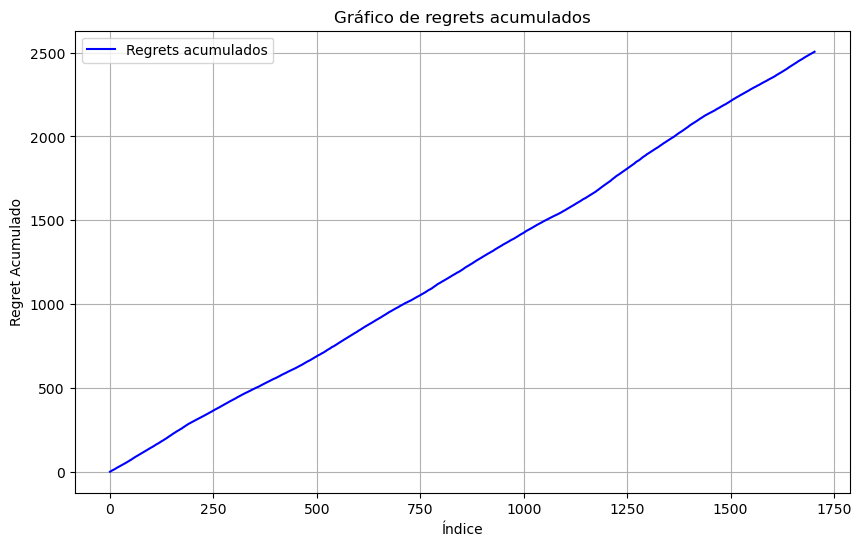

In [40]:
import matplotlib.pyplot as plt
# Calcular el acumulado
regrets_acumulado = np.cumsum(regrets_promedio )

# Graficar el acumulado
plt.figure(figsize=(10, 6))
plt.plot(regrets_acumulado, label="Regrets acumulados", color='b')
plt.title("Gráfico de regrets acumulados")
plt.xlabel("Índice")
plt.ylabel("Regret Acumulado")
plt.grid(True)
plt.legend()
plt.show()

In [41]:
regrets_promedio 

0       1.322314
1       1.611608
2       1.255773
3       1.430042
4       1.757323
          ...   
1699    1.871259
1700    1.406255
1701    1.450751
1702    1.886762
1703    1.104571
Length: 1704, dtype: float64

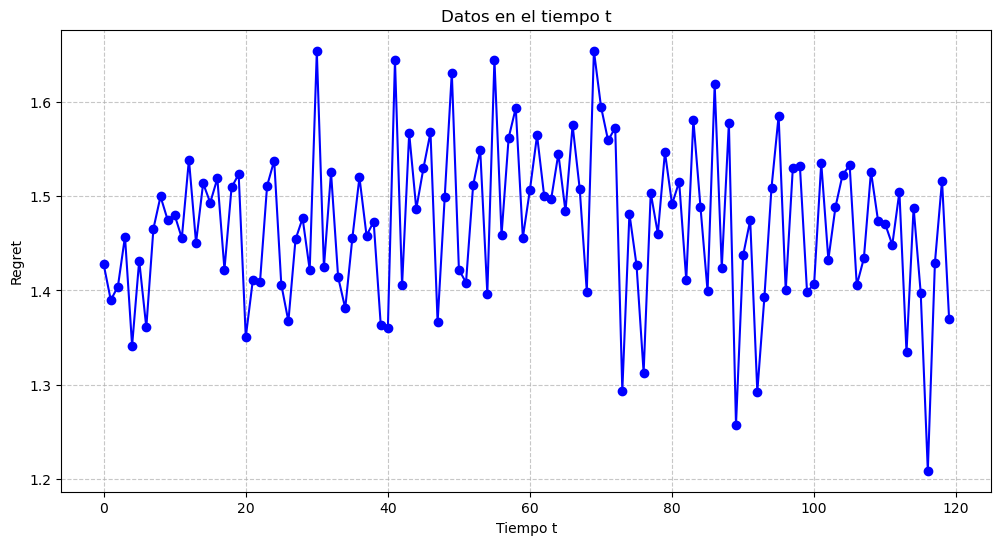

In [45]:
import matplotlib.pyplot as plt
regrets_promedios_sim = [np.mean(regrets_promedio[i::ventana-1]) for i in range(ventana-1)]
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedios_sim)), regrets_promedios_sim, marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

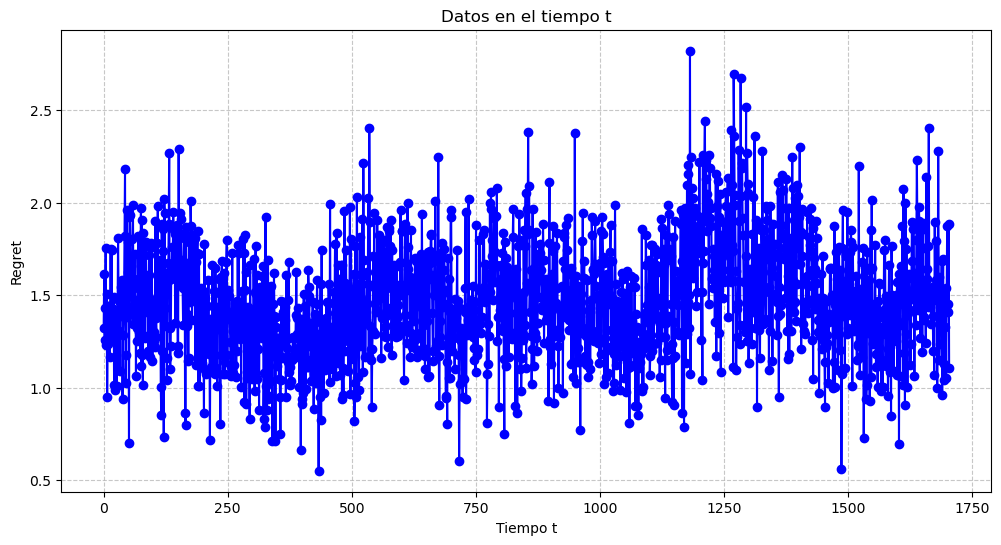

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedio )),regrets_promedio , marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [47]:
regrets

[0.0,
 0.4516088897043531,
 0.7047942603171693,
 0.9670172313814662,
 0.525736341389802,
 0.6802763041062629,
 0.7297203850992542,
 0.30103824895766795,
 0.9020707509352466,
 0.6997937879094476,
 0.6038684292269778,
 0.891570032127813,
 0.5477660034071334,
 0.3807266978037305,
 1.4876650100839708,
 0.5291877327754744,
 0.9120168007368594,
 0.5957596695281318,
 1.1746802259111648,
 0.44390713100885293,
 0.39215930395151055,
 0.16830395391534303,
 0.8387432759912494,
 0.5135248991333885,
 0.4260656182670006,
 0.731950803908429,
 0.5691619502285921,
 0.0,
 1.8664700337883104,
 0.10708428949366056,
 0.5926245922510169,
 0.37601957598902125,
 1.0390365270648099,
 1.5330242997414434,
 0.14791840574121107,
 0.0,
 0.9045233343086023,
 0.8918906859841886,
 1.056607149297979,
 0.4775651934486813,
 1.1212230933807579,
 0.5589149735982648,
 0.0,
 1.5657159257391475,
 0.6643350531306806,
 0.21277424166692427,
 0.4012419784756869,
 2.312553940264147,
 1.041792862371306,
 1.1790913297314214,
 0.62714

In [52]:
## regret promedio por bloques
def promedio_segmentos(data, size=120):
    # Dividir el array en bloques de tamaño 'size'
    return [np.mean(data[i:i+size]) for i in range(0, len(data)+1, size)]

# Calcular los promedios
promedios = promedio_segmentos(regrets)
promedios

[0.7353569363594296,
 0.7495246672605193,
 0.7782489288457477,
 0.93045580096561,
 0.8084173973600524,
 0.9985864232546305,
 0.7200484352576104,
 0.863446789358251,
 0.7618108297262427,
 2.0144577990319994,
 1.6608709251957916,
 1.1789841431404553,
 0.7282993006050921,
 0.7478138045981559,
 0.5977346532290814]

In [54]:
len(regrets)

1704

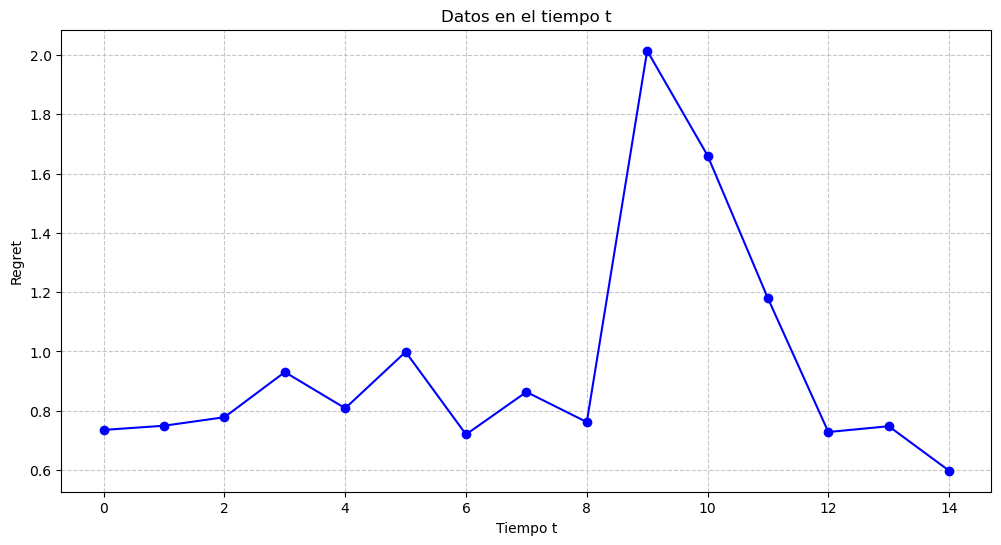

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(promedios )),promedios , marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##### suponiendo distribucion estacionaria

In [63]:
#### suponiendo sitribucion estacionaria

import numpy as np
from scipy.stats import beta
import pandas as pd

# Definimos la función de Thompson Sampling Adaptado con Descuento
def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T). 

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario = returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos = []  # Almacenar los eventos (1 si la acción fue correcta)

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t = returns_binario.iloc[0:t, k]  # Retorna lo más que pueda
            else:
                ventana_reward_t = returns_binario.iloc[t-w:t, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero(ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values) - alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k]) / 2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderación
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K):  # Actualizo tanto el que disparó como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] = gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Definir las simulaciones
n_simulaciones = 30
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante
regrets_totales = []  # Lista para almacenar los regrets de todas las simulaciones

# Ejecutar 30 simulaciones
for sim in range(n_simulaciones):
    print(f"Simulación {sim + 1}/{n_simulaciones}")
    
        # Paso 0: parámetros
    n_activos = 44  # Número de activos
    periodos = 1825  # Este es T: Número de días (365 días hábiles en un año) 4 AÑOS
    incremento = 1  # Incremento no utilizado, pero lo incluyo para referencia
    ventana_adts = 121  # Cada cuántos días cambia la media

    # Generar fechas para todo un año con días hábiles
   

    fechas = pd.date_range('1974-01-01', periods=periodos)  # Fechas de simulación

    # Inicializar matrices para los retornos y para las medias verdaderas
    data = np.zeros((periodos, n_activos))  # Matriz de retornos simulados
    medias_reales = np.zeros((periodos, n_activos))  # Matriz para almacenar las medias verdaderas

    # Función para asignar una media aleatoria inicial para cada activo
    def media_aleatoria():
        return np.random.choice([1, 1.5, 2, 2.2, 2.6, 0.5, 3.4, 1.5, 2, 2.2, 2.5, 3])

    # Generación de los datos
    # Establecer una media fija para cada activo al principio
    medias_fijas = np.array([media_aleatoria() for _ in range(n_activos)])

    for t in range(periodos):
        # Usar la media fija para cada activo durante todo el período
        medias_actuales = medias_fijas + np.random.uniform(0, 10, n_activos)  # Ajustar con desplazamiento aleatorio

        # Generar los retornos con una distribución normal centrada en la media actual
        data[t, :] = np.random.normal(loc=medias_actuales, scale=1, size=n_activos)

        # Registrar las medias verdaderas para cada activo
        medias_reales[t, :] = medias_fijas  # Registrar la misma media fija

    # Crear DataFrames de los retornos y las medias reales
    df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
    df_medias = pd.DataFrame(medias_reales, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])


    # Aplicar el escalado solicitado: df = df / (df + 1)
    df = df / (df + 1)

    # Restablecer la opción de mostrar filas (por si es necesario)
    pd.reset_option('display.max_rows')

    df_portafolios=df
    ## 
    ventana = 121  # Tamaño de la ventana móvil (ajustado para que funcione con los 20 días)
    cov_matrices = []
    for i in range(ventana, len(df_portafolios)):
        ventana_datos = df_portafolios.iloc[i-ventana:i]
        cov_matrices.append(ventana_datos.cov().values)


    # Lista para almacenar los portafolios dinámicos
    portafolios_dinamicos = []
    portafolios_dinamicos_verdad = []

    for t, cov in enumerate(cov_matrices):
        cov_matrix = cov

        # Paso 5: Descomponer la matriz de covarianzas (autovalores y autovectores)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Paso 6: Ordenar los autovalores y autovectores en orden descendente
        idx = eigenvalues.argsort()[::-1]  # Índices ordenados
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        eigenvectors = eigenvectors.astype(float)

        eigenvectors_normalized = []
        # Paso 7: Normalizar los eigenvectores seleccionados
        for i in range(eigenvectors.shape[1]):
            col_sum = np.sum(np.abs(eigenvectors[:, i]))
            eigenvectors[:, i] = np.abs(eigenvectors[:, i] / col_sum)

        # Paso 7: Normalizar los eigenvectores seleccionados
        eigenvectors_normalized = eigenvectors

        # Paso 8: Crear portafolios ortogonales a partir de los eigenvectores normalizados
        df_ortogonales = pd.DataFrame(
            np.dot(df_portafolios.values, eigenvectors_normalized),
            index=fechas,
            columns=[f'portafolio_ortogonal_{i+1}' for i in range(eigenvectors_normalized.shape[1])]
        )

        df_ortogonales_verdad = pd.DataFrame(
            np.dot(df_medias.values, eigenvectors_normalized),
            index=fechas,
            columns=[f'portafolio_ortogonal_verdad{i+1}' for i in range(eigenvectors_normalized.shape[1])]
        )

        # Paso 9: Determinar dinámicamente el número de eigenportafolios principales (l)
        mediana_eigenvalores = np.median(eigenvalues)  # Calcular la mediana de los eigenvalores
        l = sum(eigenvalues > mediana_eigenvalores)  # Contar cuántos eigenvalores superan la mediana

        # Paso 10: Seleccionar los primeros l portafolios ortogonales
        df_ortogonales_l = df_ortogonales.iloc[:, :l]
        df_ortogonales_verdad_l = df_ortogonales_verdad.iloc[:, :l]
        portafolios_dinamicos.append(df_ortogonales_l)
        portafolios_dinamicos_verdad.append(df_ortogonales_verdad_l)

        # Mostrar los pesos de los portafolios principales
        #print(f"Número de eigenportafolios seleccionados dinámicamente l={l} en t={t}")

    # Mostrar los pesos de los portafolios principales (autovectores normalizados)
    print("Pesos de los portafolios principales (autovectores normalizados):")
    print(eigenvectors_normalized[:, :l])  # Pesos de los primeros 'l' portafolios ortogonales

    # Crear una lista vacía para almacenar las filas
    filas = []
    filas_verdad=[]

    # Supongamos que portafolios_dinamicos es una lista de DataFrames
    for i in range(len(portafolios_dinamicos)):
        # Tomamos la fila correspondiente, incrementando el índice con el valor de 'i'
        fila = portafolios_dinamicos[i].iloc[ventana-1 + i]  # Ajustamos el índice de la fila
        filas.append(fila)
        fila_verdad=  portafolios_dinamicos_verdad[i].iloc[ventana-1 + i]
        filas_verdad.append(fila_verdad)


    # Convertir la lista de filas en un DataFrame
    resultado_df = pd.DataFrame(filas)
    resultado_df_verdad=pd.DataFrame(filas_verdad)
    
    
    # Ejecutar el algoritmo
    actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)
    
    regrets = []

    # Suponiendo que tienes un DataFrame como 'resultado_df_verdad' y una lista 'actions'
    for x in range(len(resultado_df_verdad)):
        action_tomada = actions[x]
        
        # Obtener la recompensa obtenida de la columna correspondiente a la acción tomada
        reward_obtenido = resultado_df_verdad.loc[resultado_df_verdad.index[x], resultado_df_verdad.columns[action_tomada]]
        
        # Seleccionar todas las columnas que contienen 'portafolio_ortogonal_verdad' en su nombre
        columnas_interes = [col for col in resultado_df_verdad.columns if 'portafolio_ortogonal_verdad' in col]
        
        # Calcular el máximo entre las columnas seleccionadas para esa fila
        maximo_reward = resultado_df_verdad.loc[resultado_df_verdad.index[x], columnas_interes].max()
        
        # Calcular el regret (diferencia entre el máximo reward y el reward obtenido)
        regret = maximo_reward - reward_obtenido
        regrets.append(regret)

    # Almacenar los regrets de la simulación actual
    regrets_totales.append(regrets)

# Convertir la lista de regrets en un DataFrame para análisis
regrets_df = pd.DataFrame(regrets_totales)

# Mostrar los regrets promedio de las 30 simulaciones
regrets_promedio = regrets_df.mean(axis=0)
print("\nRegrets promedio de las 30 simulaciones:")
print(regrets_promedio)


Simulación 1/30
Pesos de los portafolios principales (autovectores normalizados):
[[5.74690806e-03 2.41216146e-03 8.62681357e-03 2.75411455e-03
  1.58924668e-02 7.83068978e-03 2.72318149e-02 2.83593518e-02
  2.25297529e-02 2.99143481e-02 3.19801486e-02 9.47593880e-02
  2.58138827e-02 7.47495672e-02 5.71312723e-02 1.40503150e-01
  4.64616060e-02 1.94894020e-02 2.81376182e-02 2.97273865e-02
  1.88696950e-02 2.78013313e-03]
 [1.07530287e-02 8.19262179e-03 1.02118048e-02 1.34301085e-04
  9.29888747e-04 1.64000348e-03 2.04661719e-04 7.79057378e-03
  5.10051670e-03 2.18086535e-02 1.30398915e-02 1.78643631e-03
  1.76019121e-02 1.34852171e-02 7.33671931e-03 1.05389762e-02
  1.96101283e-03 1.51291293e-02 2.45967149e-04 2.24068010e-03
  2.93088156e-03 1.60815801e-02]
 [1.11277579e-03 2.16252367e-03 6.49274608e-03 7.66119028e-03
  4.76218291e-03 1.42721785e-02 1.08874870e-03 3.05382163e-03
  9.75152592e-03 1.97369989e-02 9.56915649e-04 1.75228153e-02
  1.15261939e-02 9.54908044e-03 3.50323334e-03

Simulación 2/30
Pesos de los portafolios principales (autovectores normalizados):
[[3.51954830e-03 7.90874935e-03 3.96047654e-03 2.31453033e-02
  1.66228373e-02 3.70929679e-02 1.40984437e-02 1.50726935e-03
  1.72022677e-02 2.84914851e-02 1.04132792e-03 1.66274645e-02
  5.77695902e-02 1.01977872e-02 4.26421332e-02 1.45327423e-02
  3.37573099e-02 2.71109332e-02 2.09807562e-02 3.59254396e-02
  4.81803836e-02 2.11227243e-02]
 [6.32904213e-03 2.86412839e-03 1.64307232e-02 7.39661259e-04
  1.73140897e-02 1.14520303e-02 7.57032377e-03 7.13044986e-03
  5.25729601e-03 8.78446197e-03 2.41570366e-03 3.73116595e-02
  3.76350812e-02 1.67227055e-02 4.77380666e-03 1.12202542e-02
  2.77331276e-03 1.55750526e-03 1.61522205e-02 5.98736906e-04
  2.96669049e-02 3.22440957e-02]
 [2.43284552e-02 1.34767230e-02 5.23954412e-02 4.48103940e-02
  5.54116867e-02 4.80830706e-02 7.58277264e-02 1.08091737e-02
  2.06608323e-01 1.13843390e-02 9.31951300e-02 2.50798605e-02
  3.63568797e-02 2.01344356e-02 1.62205888e-02

Simulación 3/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.68403540e-03 4.80690435e-03 1.04977340e-02 3.24922429e-03
  1.66354462e-02 8.16673501e-03 1.89897997e-02 1.17205833e-02
  4.41544496e-03 7.35291885e-03 2.97874086e-02 7.19602461e-03
  2.11610607e-02 1.27209905e-02 3.38988400e-03 9.66328352e-03
  3.95065706e-04 1.37186361e-02 2.15626412e-03 8.03880672e-03
  3.51859774e-02 2.11295472e-02]
 [2.05341393e-03 8.70132993e-03 3.70103431e-03 3.17722797e-02
  1.51031686e-02 6.67985734e-03 3.76779087e-03 1.43029342e-02
  7.04982374e-03 8.45436615e-03 1.67998656e-02 2.81049719e-04
  1.85073129e-02 1.93113651e-02 2.61289738e-04 4.86195213e-03
  3.52385601e-02 3.76495726e-02 2.18998082e-02 4.24597525e-02
  1.43696820e-02 2.86482217e-02]
 [6.62612946e-01 6.37243741e-02 8.27539528e-03 4.60299286e-03
  7.13269445e-03 4.95851668e-03 2.08619918e-03 6.44452431e-03
  1.99745809e-03 1.28409760e-03 6.03836190e-03 3.82214051e-03
  1.31403383e-03 4.40617424e-03 2.55657399e-03

Simulación 4/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.45683876e-02 6.28792039e-03 2.44106025e-02 1.47791300e-02
  1.55102738e-02 3.19696361e-02 1.90691578e-02 1.33086090e-03
  4.90582441e-02 5.22234702e-02 1.65596376e-02 2.28798384e-02
  1.89111064e-02 9.72102424e-02 6.28608648e-02 4.16667563e-02
  4.13319032e-02 7.43006161e-03 3.53850706e-02 4.02079835e-02
  1.32549647e-02 1.88998261e-02]
 [1.20815756e-02 9.90724293e-03 7.11308397e-03 2.67927657e-02
  2.71291398e-02 3.27307401e-03 3.40898362e-03 1.22055378e-02
  1.37833510e-03 3.15732944e-02 3.77947735e-02 2.13756533e-02
  3.79948957e-02 2.05427361e-02 4.58010381e-02 3.93451866e-04
  5.78683788e-02 1.09359240e-01 2.12925017e-02 2.37211303e-03
  7.84509936e-02 4.81508885e-03]
 [4.36426204e-03 4.81487916e-03 5.22738067e-03 7.17720575e-03
  3.41761994e-04 9.66535319e-03 1.00019592e-02 1.37967963e-02
  4.58416628e-04 2.92069434e-02 1.18510503e-02 1.24376256e-02
  2.59537408e-04 3.46083274e-02 9.83638468e-03

Simulación 5/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.56492404e-04 1.01341617e-03 1.69127865e-03 5.80372931e-04
  3.87905442e-03 3.90743806e-03 1.46942383e-03 7.70355410e-04
  1.02588700e-02 4.66901990e-03 6.21268768e-03 1.60111152e-02
  6.66796807e-03 2.57821800e-02 3.69388766e-03 9.65999897e-05
  1.16731866e-02 6.26282572e-03 3.19349204e-02 1.09956453e-02
  6.15642195e-03 6.24994078e-02]
 [7.98235407e-04 4.34611333e-03 6.98715120e-03 5.51367761e-03
  1.65423421e-02 1.77222441e-04 6.53847915e-03 7.99911471e-03
  2.35940884e-02 7.20935442e-02 6.06960008e-02 6.09168932e-02
  1.16111829e-02 1.80379051e-01 2.10827894e-02 6.22628748e-03
  2.86836431e-02 7.32655078e-02 4.15026402e-02 3.54339735e-02
  3.88019797e-02 1.97889089e-02]
 [2.67326737e-04 1.82221193e-03 4.07415916e-03 3.67360614e-03
  3.45867724e-03 5.58791699e-03 4.22532027e-04 4.71173549e-03
  1.45893478e-03 5.85974817e-03 1.43176857e-03 5.71608808e-05
  1.71958662e-03 8.16509966e-04 3.56157929e-03

Simulación 6/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.04800185e-02 2.98168993e-02 4.60259877e-01 5.64399062e-03
  4.38041592e-02 3.01891104e-02 4.56186075e-03 7.03597872e-03
  7.02537717e-03 2.33540634e-03 1.79317374e-02 1.14390029e-03
  1.38011488e-02 2.86029044e-03 1.40526137e-03 2.06395693e-03
  9.35194651e-03 3.19770942e-03 9.88592083e-03 3.53398350e-03
  2.31027676e-03 1.06365337e-03]
 [3.10126551e-03 3.18118251e-03 1.15234725e-02 9.84799135e-03
  8.06899769e-03 1.65235345e-02 1.21958679e-02 1.19151351e-02
  1.14466994e-03 6.02597966e-03 1.77259706e-02 1.21695009e-02
  1.03496485e-02 7.11238956e-03 5.82954880e-03 1.21238638e-02
  6.70507197e-03 3.37969503e-03 6.89280639e-03 9.23628566e-03
  1.42833615e-02 4.80908267e-03]
 [5.94375714e-03 2.05472802e-02 4.06916689e-02 3.22458901e-02
  4.44558659e-01 5.91292202e-03 1.69856872e-03 7.11659730e-03
  2.18068694e-02 6.40378535e-03 5.14555282e-03 1.16693489e-03
  5.53317383e-03 5.54119460e-03 1.37875609e-02

Simulación 7/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.20111669e-02 3.00220862e-02 1.21407702e-02 7.81887068e-03
  1.76003478e-02 1.09816066e-02 1.46851004e-02 8.31775816e-02
  3.44169316e-02 1.72081278e-01 2.16557598e-02 4.17513055e-02
  9.41563866e-02 1.57381284e-02 2.18818749e-02 2.93752854e-02
  3.59041249e-03 1.98712328e-02 3.44473306e-03 1.34244297e-02
  2.73572312e-03 3.05951704e-02]
 [6.16123629e-04 4.78776005e-03 2.24628157e-03 7.33379903e-03
  7.00298452e-03 1.28072019e-02 2.38008728e-03 4.97783328e-04
  4.19517322e-03 6.76639354e-03 1.05513859e-02 1.46083488e-02
  9.44300713e-03 3.71404063e-03 1.64487389e-03 1.09925698e-03
  6.63874180e-04 1.46679567e-02 5.52322533e-03 7.36035388e-03
  1.27586466e-02 1.64750740e-02]
 [3.08382548e-03 9.71022202e-03 5.53176202e-03 7.07806706e-03
  5.47781087e-04 2.33730485e-02 3.64806838e-02 2.22983195e-02
  4.33384702e-03 1.21095781e-02 7.14463823e-04 1.18349395e-01
  3.19184665e-03 4.52773946e-02 8.77631084e-02

Simulación 8/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.02326285e-03 7.51253097e-03 2.33729313e-03 2.37554401e-02
  1.61754589e-02 5.44758720e-02 8.76421998e-02 2.83898946e-02
  4.87338676e-02 5.86221073e-02 9.68539161e-02 5.82504644e-02
  6.82671073e-02 1.58616378e-02 3.30607076e-02 4.24334893e-02
  5.35679180e-02 1.29044255e-02 4.61794628e-02 5.83175021e-02
  2.27552003e-02 1.57704058e-02]
 [1.98925734e-02 2.97268632e-02 1.12170327e-02 2.64088412e-02
  2.10039327e-02 3.81100713e-02 7.28745649e-03 1.07360530e-02
  1.09627403e-01 6.56792269e-03 1.07746788e-02 1.26835460e-01
  4.78624903e-02 4.13136471e-02 5.92416405e-02 1.04940987e-02
  1.62907699e-02 5.00131971e-02 4.21527739e-02 7.03492515e-03
  1.78418835e-02 3.20483496e-03]
 [1.76408293e-03 3.21717826e-02 5.79999063e-04 1.09927710e-01
  1.84060920e-02 1.65093255e-01 6.64985117e-02 1.09923621e-01
  3.54427820e-02 2.16549274e-02 1.57565566e-02 1.00917509e-02
  3.10296544e-02 1.21107638e-02 1.48988720e-02

Simulación 9/30
Pesos de los portafolios principales (autovectores normalizados):
[[8.71779464e-04 2.78435646e-03 6.87437564e-03 1.16469609e-04
  1.34119098e-03 4.57794139e-04 1.01295628e-02 1.47165044e-02
  9.80172918e-04 1.17717132e-02 1.58432224e-02 2.03501051e-02
  1.84944889e-02 1.97589826e-02 1.32903319e-02 8.02675734e-03
  1.74353868e-02 1.55053029e-02 2.45493342e-02 3.95331890e-02
  5.26532073e-03 3.55758318e-02]
 [7.24019840e-03 1.10960442e-03 6.46277011e-03 1.41355921e-02
  1.54591308e-02 5.56866375e-04 3.41124462e-03 1.96666263e-03
  2.55958835e-02 5.48284161e-03 6.79583320e-03 3.71771040e-02
  1.97804984e-02 2.80938486e-02 1.13241627e-02 4.56396059e-03
  4.52594595e-02 1.00709222e-02 5.54521182e-02 5.51942701e-02
  5.30160749e-03 6.84608523e-02]
 [5.60833654e-03 4.22962641e-03 7.09835243e-03 6.93704181e-03
  2.83575681e-02 3.81433039e-03 1.04761556e-02 8.73510102e-03
  1.11927160e-03 1.20688103e-02 6.17390869e-03 1.59736269e-04
  7.50426163e-03 1.60985924e-02 4.12254628e-02

Simulación 10/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.53545549e-02 7.12838098e-02 5.06213232e-01 3.17125906e-02
  2.59273860e-02 9.14066624e-03 6.22636059e-03 1.71642889e-04
  8.68758001e-04 4.93826948e-03 1.07924776e-02 2.27607695e-03
  4.95708314e-03 9.68085569e-04 1.50544540e-02 3.95386932e-03
  7.21860021e-03 7.89648697e-03 7.51435900e-04 1.01315006e-02
  2.65051025e-03 8.66574320e-03]
 [3.14324750e-03 1.61421079e-02 7.25389348e-03 1.40402851e-02
  2.01843445e-02 6.41785616e-04 1.62869870e-02 3.28847048e-03
  8.60596726e-03 1.01706761e-02 4.43063102e-03 2.86341052e-02
  1.16995236e-03 3.21349959e-02 3.03766581e-02 6.24169767e-03
  2.04324459e-02 4.26766369e-02 2.42860806e-02 1.95830149e-02
  3.80299816e-02 4.50143828e-02]
 [4.20195186e-03 4.97833828e-03 5.85029938e-03 1.18139310e-03
  2.91773197e-03 7.31035794e-03 4.35058997e-03 6.48742464e-03
  7.77910865e-05 1.02411351e-02 2.86931738e-02 5.48643784e-03
  1.51461284e-02 9.82890699e-03 1.25330977e-0

Simulación 11/30
Pesos de los portafolios principales (autovectores normalizados):
[[4.87165801e-03 5.18665221e-01 6.07763942e-02 3.80395821e-02
  5.49491878e-03 1.42066920e-03 1.77279383e-03 6.55717571e-03
  5.47867009e-03 7.37071414e-03 2.20942056e-03 6.75034705e-03
  2.39622305e-04 1.40292660e-02 2.13453500e-03 9.57069315e-04
  3.02701675e-03 1.26163225e-03 4.43424116e-03 6.39952700e-03
  3.63567782e-04 6.73827866e-03]
 [1.31839563e-02 2.23673137e-02 1.05219020e-01 1.30990157e-02
  2.90841231e-01 5.99881100e-02 1.13718803e-03 7.12765860e-02
  6.33418688e-03 4.72910126e-02 2.69235437e-02 7.14843973e-03
  1.70443162e-02 1.29706276e-03 2.14657746e-02 1.00263391e-02
  1.21391828e-03 1.12203692e-02 8.18316017e-03 1.62902616e-02
  7.40729359e-03 5.52616078e-03]
 [2.26030375e-03 4.20692292e-03 7.98123757e-03 3.75271149e-03
  3.72017616e-03 5.34688661e-03 3.98734827e-03 1.01529903e-02
  9.07979736e-03 9.88373753e-03 1.14742956e-02 1.42588729e-02
  2.02054924e-03 4.17754399e-03 1.90593513e-0

Simulación 12/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.27081314e-03 1.30101501e-02 3.04998204e-02 9.37415949e-02
  3.01929920e-01 4.52643103e-02 8.60594619e-02 2.13075757e-02
  5.70034418e-02 6.31244169e-02 5.33004669e-02 2.67261383e-02
  3.07158278e-03 1.22100228e-02 1.54442273e-03 2.91360238e-03
  1.22544042e-02 2.00005310e-03 5.95698852e-03 5.99513620e-03
  7.46378552e-03 1.16348125e-02]
 [2.12619301e-03 6.37142021e-04 3.80987313e-04 5.79575615e-04
  1.67762239e-02 2.29478292e-02 1.02173880e-02 4.03548020e-02
  4.25889087e-02 1.21699017e-02 1.19507803e-02 8.67971152e-03
  4.52529342e-02 1.21762974e-02 2.30063133e-02 4.54382439e-02
  4.08094179e-02 5.18320984e-02 3.86583089e-02 8.27449492e-03
  4.48095244e-02 5.61784448e-02]
 [4.50275640e-03 3.78993566e-03 6.59750316e-03 5.76346992e-04
  2.09835061e-02 1.06425745e-03 2.20952770e-02 3.03686261e-03
  2.15399017e-02 1.31458227e-02 1.75320415e-02 1.73236007e-02
  2.29913793e-02 4.33721936e-03 1.43675089e-0

Simulación 13/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.55199489e-03 2.33816746e-02 9.89449219e-03 7.65581606e-03
  3.01441445e-03 6.45364921e-02 3.35433850e-02 2.01815394e-02
  8.96252314e-02 6.38175780e-02 5.49318932e-02 7.76544724e-03
  1.56186790e-01 3.66186657e-02 5.18498122e-02 2.47827457e-02
  1.87592000e-02 5.58514051e-02 1.55422650e-03 1.14770998e-02
  2.62314488e-02 1.45814055e-02]
 [5.47557372e-03 2.66904053e-03 1.55069564e-03 5.94075321e-03
  8.68777449e-04 1.23518224e-02 6.55357784e-03 3.30765296e-03
  1.71773400e-03 1.86680729e-02 1.31869370e-02 3.55318236e-03
  3.11434154e-03 7.60837474e-03 4.41812349e-03 1.95524730e-03
  2.87023493e-02 1.74949292e-02 1.01000549e-02 1.75577929e-02
  2.78459918e-03 2.20416446e-02]
 [1.72413153e-03 5.45273140e-01 6.53857370e-02 4.14620207e-02
  1.96567001e-02 4.80294163e-03 8.63052264e-03 1.47693959e-03
  7.84702611e-04 1.02715564e-02 6.99075271e-03 4.30176407e-04
  7.95320600e-03 9.08205466e-03 4.24996792e-0

Simulación 14/30
Pesos de los portafolios principales (autovectores normalizados):
[[3.97677416e-04 2.50543269e-04 8.88224034e-04 1.91676212e-02
  1.68990110e-02 1.73410009e-02 4.35989558e-03 1.89112750e-02
  1.63668520e-02 2.08968778e-02 2.58154249e-02 8.15594112e-02
  4.90330872e-02 1.74735646e-02 2.26181147e-02 6.29781382e-02
  6.58657908e-02 5.70889890e-02 5.97445843e-02 1.33734802e-02
  6.51642411e-02 1.81277803e-02]
 [2.83683184e-04 1.16956372e-03 6.12448975e-03 6.92984719e-02
  1.98249906e-02 9.57405085e-03 8.92024166e-04 1.47344886e-03
  1.43893183e-03 2.33814273e-03 3.63873812e-02 5.69221919e-02
  6.28118064e-02 3.48771866e-02 3.11053366e-02 3.36012627e-02
  1.39658348e-02 5.83946439e-02 9.03259924e-04 3.82705271e-02
  2.25482720e-02 3.01352586e-02]
 [1.32070693e-05 8.03143653e-04 6.73504129e-03 2.02257502e-03
  2.54214041e-03 1.75626710e-02 8.03482973e-03 1.33876872e-02
  1.26835151e-03 2.00725342e-02 7.03714778e-03 1.36939085e-03
  1.40229469e-02 1.23241089e-02 2.84951761e-0

Simulación 15/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.30057737e-03 1.61888330e-02 1.46160509e-03 8.02314901e-03
  2.97499451e-03 6.91839115e-03 2.08498607e-02 6.18215974e-03
  1.83587241e-02 2.84380957e-03 4.01798229e-02 1.20454991e-02
  1.10244166e-02 3.21765041e-02 5.12576505e-02 2.34229048e-02
  4.14885321e-02 6.34401240e-02 5.26335504e-02 1.14834883e-01
  6.98764995e-03 3.80196128e-02]
 [1.20800552e-02 1.95946813e-02 3.29398674e-02 3.16220578e-02
  4.60704303e-02 1.67336684e-02 3.36703826e-02 2.08410656e-02
  4.11996749e-02 5.13055002e-02 3.74634576e-02 7.74458819e-02
  4.64874397e-02 1.56656949e-02 7.30821417e-02 3.45600457e-02
  5.12258154e-02 2.73685553e-02 4.10814574e-02 2.20372926e-02
  4.44344271e-02 1.46667233e-02]
 [1.14219007e-02 4.26914323e-02 2.22968452e-03 2.50040371e-01
  6.92508028e-02 2.42603272e-03 1.81687715e-02 6.48112796e-02
  2.84153054e-02 4.19746085e-02 1.68428284e-03 1.81816782e-02
  2.97410950e-03 6.64996487e-03 1.92604025e-0

Simulación 16/30
Pesos de los portafolios principales (autovectores normalizados):
[[6.24657722e-04 1.77461939e-03 4.96133586e-04 3.96267508e-03
  6.86278385e-03 1.25414649e-03 1.41170656e-02 5.37959886e-03
  5.37965589e-03 1.87435700e-04 2.36777405e-01 2.54702511e-02
  5.08029574e-02 1.03326552e-01 8.49596859e-03 3.81503039e-02
  3.02519957e-02 1.00295979e-02 9.32529575e-04 3.93635293e-02
  3.16132577e-03 2.27012110e-02]
 [7.36961845e-04 5.65482566e-03 6.89305636e-04 1.93050907e-04
  2.46827062e-02 3.53824719e-02 1.62380900e-02 4.64081190e-02
  6.23083674e-02 2.86545739e-02 1.19146240e-01 9.35450270e-02
  5.79601993e-02 1.52013179e-01 3.47372420e-02 6.13898104e-02
  2.09442847e-02 1.35911399e-02 1.27535990e-02 8.22248447e-03
  3.45097959e-02 6.19339938e-03]
 [2.54811907e-04 1.95985689e-03 3.04516729e-04 1.06323647e-02
  6.05174301e-03 4.01524116e-03 3.00271741e-03 8.29181026e-03
  5.24632908e-03 1.20804915e-02 6.58222923e-03 2.15978289e-03
  1.53667229e-02 2.80709688e-02 9.00527111e-0

Simulación 17/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.77109679e-03 2.48628666e-03 4.37827287e-03 1.29697678e-02
  8.85882674e-03 1.09670702e-03 1.11575595e-02 1.03559167e-02
  8.65522386e-03 2.25570024e-03 1.36719970e-02 2.27182422e-02
  1.58128696e-02 3.73506380e-03 3.48414444e-03 4.93286166e-02
  1.32458849e-02 3.95007438e-02 3.50827611e-02 4.62404910e-02
  1.44707243e-02 2.59256068e-02]
 [1.17575988e-02 8.67795276e-01 2.66737397e-03 5.27369647e-03
  7.05650019e-03 3.63899355e-04 2.46199399e-03 2.31998191e-03
  8.14619460e-04 2.29680351e-03 1.91764577e-04 9.04124197e-04
  1.45800414e-03 1.86549391e-04 5.15482765e-04 1.40671171e-03
  1.07777016e-03 1.12898635e-05 7.38414391e-04 4.94418720e-04
  3.14965605e-04 6.56644902e-04]
 [4.02631144e-03 1.01881413e-03 8.43525129e-03 7.17307400e-03
  1.27237794e-02 7.57720331e-03 1.68807410e-02 1.14145894e-02
  4.12396695e-03 7.30292224e-03 5.72387967e-03 5.81982070e-03
  2.13381730e-02 4.04717883e-02 2.70927612e-0

Simulación 18/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.78362893e-03 3.71987935e-03 8.77581177e-03 9.12547688e-03
  1.42727238e-02 1.52414224e-02 5.58572556e-03 1.04794971e-02
  6.91864425e-03 7.03407938e-03 1.97528159e-02 2.42394823e-02
  3.11783570e-02 1.39895316e-02 1.61045914e-02 3.14372842e-02
  2.98215305e-02 5.28276049e-02 2.32763772e-03 6.07699192e-03
  2.60588460e-02 3.05099643e-02]
 [2.05744602e-03 1.61312928e-02 2.53888592e-02 2.22188232e-02
  1.87282902e-02 2.90631153e-02 1.62112506e-02 3.10691215e-02
  7.64531134e-02 1.55863748e-02 4.54253951e-02 4.24438860e-02
  1.41428168e-02 5.88349579e-02 1.01176389e-01 1.08901981e-01
  5.10153879e-02 3.95148858e-03 5.64598145e-02 2.16905480e-03
  1.48055820e-02 5.47519211e-03]
 [8.52381935e-03 3.02916164e-02 1.92962040e-01 3.10838900e-02
  3.08118042e-02 9.89738969e-02 6.30213695e-02 4.23568946e-02
  1.96701092e-02 3.57756201e-02 6.15530943e-02 5.10894920e-02
  2.25845799e-03 3.97303593e-03 1.37149136e-0

Simulación 19/30
Pesos de los portafolios principales (autovectores normalizados):
[[4.72402484e-03 7.60532746e-03 2.15444646e-02 4.97074688e-03
  1.60552504e-02 2.61807900e-02 2.85548169e-02 1.52473139e-02
  4.80641929e-03 3.19319008e-02 3.67526283e-02 7.64528840e-03
  1.20195579e-02 1.48533030e-02 7.54861519e-03 6.40412815e-03
  9.88189705e-03 2.15503334e-02 1.77472565e-02 8.68575760e-03
  2.90442450e-02 4.30644577e-03]
 [2.25896257e-04 5.61165349e-02 7.54569520e-02 3.34222031e-02
  2.70464228e-02 1.21467762e-02 3.94782159e-02 1.02045895e-01
  1.18972143e-01 7.99357371e-02 6.13175155e-02 4.32720593e-02
  4.63963593e-02 3.41092408e-02 2.80128107e-02 8.30426136e-03
  2.33075103e-02 7.02784319e-03 4.61462412e-03 2.50307904e-03
  4.83840671e-03 3.49052655e-02]
 [9.02204085e-03 1.37356462e-03 8.11311314e-03 1.34232227e-02
  1.15395534e-02 1.03432797e-02 1.49323925e-02 9.72188410e-03
  1.14921278e-03 2.16228003e-02 4.21577797e-02 2.47891235e-02
  7.00505593e-03 1.40443687e-03 8.69674333e-0

Simulación 20/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.54508865e-03 4.78984585e-03 5.63382961e-03 1.18649919e-02
  1.63784396e-03 5.45337679e-03 7.28953311e-03 7.53647084e-04
  1.74537678e-02 1.15098981e-02 3.09374234e-03 3.32777196e-02
  4.11246414e-02 1.82501935e-02 3.31777579e-03 3.04213071e-03
  2.68478534e-02 1.72498288e-03 5.56672109e-02 7.86757629e-03
  2.75122435e-02 2.82422297e-02]
 [7.33295717e-04 1.40859692e-02 8.42972733e-03 8.29301214e-03
  5.51272443e-03 4.94567485e-03 1.15068179e-02 5.29988126e-04
  1.75091911e-02 4.91520421e-03 1.51877073e-02 1.22932208e-02
  2.45029157e-02 2.25409839e-02 2.98819158e-03 3.58263592e-02
  5.81998620e-03 1.41287345e-02 1.73397278e-02 1.25010936e-02
  1.38355463e-02 3.34333465e-02]
 [1.29291181e-03 1.92268000e-04 5.25939446e-03 1.44733651e-02
  4.56287293e-03 4.01617610e-03 8.91738004e-03 1.00732082e-02
  4.16216638e-02 3.67325090e-02 4.36463096e-03 2.81734483e-02
  6.43281382e-03 7.84817104e-02 2.68246869e-0

Simulación 21/30
Pesos de los portafolios principales (autovectores normalizados):
[[3.59559893e-03 1.31605830e-02 9.69954011e-05 7.91679812e-03
  8.04049228e-03 1.65052890e-02 7.33552487e-03 4.49591496e-03
  7.22103089e-03 1.21350192e-02 9.81219307e-03 7.11412835e-03
  1.61871629e-02 1.21290703e-02 3.76536388e-02 2.63753490e-02
  1.95785792e-02 2.51785382e-02 5.33084280e-02 7.36888428e-02
  5.26598551e-02 9.67097889e-03]
 [3.09347137e-03 1.52201868e-02 2.66883202e-02 1.74243931e-02
  3.80539107e-02 9.47053902e-03 4.10294051e-03 1.85948967e-02
  5.21660769e-02 2.59950235e-02 9.79307738e-04 5.53073565e-02
  1.62941795e-01 1.58522175e-02 4.42592114e-02 4.88836801e-02
  2.41229490e-02 3.51165514e-03 1.67883178e-02 1.70791037e-02
  8.89343766e-03 2.59983129e-02]
 [1.97976238e-03 2.77386302e-02 4.96420132e-03 1.64390786e-03
  3.08648831e-04 7.78880799e-03 3.41197733e-03 8.69794589e-04
  2.58208988e-03 3.36769492e-04 2.10542031e-03 1.28343029e-02
  2.96612713e-02 9.80622029e-04 5.27382478e-0

Simulación 22/30
Pesos de los portafolios principales (autovectores normalizados):
[[7.84697934e-03 3.18431964e-03 4.37357052e-02 7.57779948e-02
  5.03074377e-02 5.83524522e-02 1.92972474e-01 5.53631116e-03
  4.25179735e-02 5.47683229e-02 3.80998625e-02 4.74338048e-03
  1.42431083e-02 3.55820316e-02 4.09153750e-02 8.81286909e-03
  2.02942618e-03 8.44036084e-03 4.05408494e-03 6.79576442e-03
  7.68362938e-03 2.13279748e-02]
 [5.02012805e-03 1.67804169e-03 1.88566504e-02 3.27007315e-02
  1.23627662e-02 5.12214459e-02 9.90899129e-02 2.07329153e-02
  1.22234949e-01 1.01548661e-01 6.41275391e-02 6.44425664e-02
  1.12731686e-02 1.13647092e-02 9.96635696e-03 1.77202780e-02
  2.98423869e-02 2.04159507e-02 3.88265838e-02 1.81682482e-02
  1.22925602e-02 1.27906099e-02]
 [3.24126645e-03 2.35229970e-03 1.95791438e-03 9.92653214e-03
  4.48886572e-05 1.68599389e-02 3.18383255e-02 3.71009330e-03
  1.04329569e-02 5.67374999e-03 1.03663484e-02 7.59393160e-03
  3.90274041e-02 1.97313690e-02 1.00722019e-0

Simulación 23/30
Pesos de los portafolios principales (autovectores normalizados):
[[4.22563187e-03 3.45352563e-03 4.96367164e-03 7.53407995e-03
  8.14139753e-05 4.00139595e-03 9.51624616e-03 2.20455884e-02
  6.38913377e-03 4.82147434e-03 2.41264950e-04 3.32780827e-03
  1.84084614e-02 1.13678763e-02 1.66650168e-02 4.38689678e-02
  2.88403174e-02 1.62114455e-03 1.03030907e-02 2.78518841e-02
  2.09264737e-03 2.29579376e-02]
 [3.47860424e-03 2.00400388e-03 2.14772756e-02 1.55513502e-02
  2.88225185e-03 6.68956322e-02 2.02244411e-04 1.85913167e-02
  4.33724660e-02 2.87087363e-02 1.14245139e-02 4.11057488e-02
  3.10944709e-02 6.59503275e-03 7.14051018e-02 2.30046402e-02
  8.19067005e-03 3.56286961e-02 3.14824969e-02 1.99964023e-02
  9.22584036e-02 1.72355054e-02]
 [6.85728723e-04 5.51138901e-03 3.42964055e-03 4.17179055e-03
  2.80175471e-02 1.69530627e-03 2.27036739e-02 2.29167693e-02
  2.15513893e-02 6.34467651e-03 4.07174595e-03 2.46253798e-03
  6.79034877e-03 1.54063614e-02 3.28380780e-0

Simulación 24/30
Pesos de los portafolios principales (autovectores normalizados):
[[5.41608226e-04 7.32186714e-03 7.81666347e-03 7.60253122e-03
  5.83414544e-03 6.86414610e-03 1.27760003e-02 5.44442004e-04
  4.58582697e-03 2.86284256e-02 8.70368141e-03 7.46191616e-03
  8.03596225e-03 3.21030895e-02 6.36362275e-02 4.33143542e-02
  1.28498998e-02 4.98589647e-02 8.99734400e-02 6.34358313e-02
  4.98124034e-02 7.37331603e-02]
 [1.37799863e-04 5.90141605e-03 7.89060482e-03 1.73151125e-02
  3.12857304e-02 1.21811438e-02 2.03335407e-03 8.91942118e-03
  1.08927752e-02 1.87384660e-03 2.23405432e-02 1.36387430e-02
  1.52869154e-02 2.82751810e-03 2.78522696e-02 2.21370928e-02
  1.20111025e-02 3.51797627e-02 3.18102259e-02 1.44651479e-02
  4.34365907e-02 1.97212607e-02]
 [2.49086280e-04 5.57474512e-05 2.80225295e-02 5.29686661e-02
  3.08577579e-01 1.48510802e-02 5.35738638e-02 1.18760129e-02
  6.07945589e-02 3.30998138e-02 7.04685878e-03 6.08279648e-03
  2.58683860e-03 1.42998645e-03 9.16368945e-0

Simulación 25/30
Pesos de los portafolios principales (autovectores normalizados):
[[7.45222369e-04 2.41967442e-03 2.10468669e-02 9.64345852e-03
  1.46370591e-02 8.23304594e-03 2.85618836e-02 2.66798992e-02
  7.57607510e-02 9.96037327e-02 2.21992933e-01 3.63492367e-02
  2.59556574e-02 1.04259423e-02 1.37717026e-02 9.64756193e-03
  2.34204781e-02 2.50360952e-02 4.69897592e-02 1.50208985e-02
  3.58755475e-04 9.23977161e-03]
 [1.17372056e-03 2.85725764e-04 1.19544523e-02 5.57517070e-03
  2.01020563e-02 4.25668575e-03 5.95146203e-02 7.24247055e-02
  2.80670950e-02 2.01187534e-02 7.76586338e-02 4.71303729e-02
  7.80747691e-03 3.75692577e-02 2.71419632e-02 4.25678787e-02
  5.78703163e-02 1.14308481e-01 6.20100613e-02 2.43999681e-02
  1.21861349e-02 1.95177816e-02]
 [5.43860463e-04 1.46993336e-03 3.47784034e-03 1.65738647e-03
  7.27175058e-03 4.11396142e-06 1.37946135e-04 9.37895055e-03
  1.61064521e-02 2.59716525e-03 4.22972810e-03 1.04478814e-02
  3.15555919e-03 1.60458043e-02 3.52519923e-0

Simulación 26/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.42200140e-02 4.98668397e-03 5.27552183e-03 9.22154130e-03
  3.37479633e-03 1.96884903e-03 2.04465276e-02 2.19377051e-02
  2.87754141e-02 3.37939395e-03 8.89130598e-03 1.46828424e-04
  2.16465342e-03 6.28846896e-02 5.48163859e-02 3.77138803e-02
  1.20837323e-01 8.97331261e-02 4.85926056e-02 2.22032005e-02
  5.87481926e-02 3.58357534e-02]
 [3.55630165e-03 3.03432681e-03 4.61604038e-05 3.88908110e-03
  1.65245039e-03 1.90601555e-02 4.72072742e-04 1.08836083e-02
  4.60802601e-04 4.13215476e-03 5.46373278e-04 1.24920048e-03
  5.19114925e-03 2.05299877e-02 4.26017624e-04 1.67373671e-02
  2.14834447e-02 1.74116560e-02 1.70935741e-03 2.47752063e-03
  1.65336559e-02 1.75725596e-02]
 [1.65352960e-03 5.81587241e-03 1.78576825e-03 2.00722769e-03
  2.03789187e-03 2.57217541e-03 1.43591157e-03 1.42798556e-02
  1.94180782e-03 3.31809318e-03 2.23108797e-02 4.62408815e-03
  1.12207315e-02 1.28490781e-02 5.52504921e-0

Simulación 27/30
Pesos de los portafolios principales (autovectores normalizados):
[[9.58817210e-01 1.50612791e-03 2.16064221e-03 2.97821674e-04
  2.99967938e-04 3.55288895e-04 1.58010002e-04 4.55976739e-04
  2.84316277e-05 2.53500292e-04 3.74360934e-04 3.65801622e-04
  9.50293307e-04 4.09652863e-04 2.45751510e-05 1.58498238e-04
  6.65924232e-05 8.80551703e-05 2.09913013e-04 1.87320242e-04
  1.92943466e-05 1.24614768e-04]
 [3.39724938e-03 7.60325524e-04 4.48322809e-03 2.32860809e-02
  4.26768153e-02 2.44476812e-02 6.27348403e-02 2.09808193e-02
  3.07368111e-02 3.46422064e-02 7.12713804e-02 5.71281679e-02
  5.09215980e-02 8.34958019e-02 7.55131616e-02 1.78706761e-02
  2.33904723e-02 1.52671505e-02 4.92227641e-03 6.56910093e-03
  4.68498743e-02 8.95764355e-03]
 [7.44934804e-04 1.33134314e-03 5.55720959e-03 4.77681619e-03
  3.98628835e-02 7.54127036e-03 1.56606449e-02 3.42403667e-02
  3.98017111e-02 2.09386125e-02 1.03060568e-02 2.99977961e-02
  3.12395543e-02 4.31110277e-02 2.89130905e-0

Simulación 28/30
Pesos de los portafolios principales (autovectores normalizados):
[[1.09715994e-04 1.51037032e-02 2.24820579e-03 2.78351486e-02
  1.09449610e-02 3.16823043e-02 1.73663976e-02 9.99154046e-03
  1.97272737e-01 2.62532148e-02 7.18868188e-02 8.27971967e-02
  3.77764139e-02 6.56261074e-03 1.40463126e-03 3.19080143e-02
  2.23164638e-02 8.25544795e-03 1.28214461e-02 7.01912908e-03
  5.77056176e-02 4.31901663e-03]
 [5.70486754e-05 1.94605047e-03 1.61622386e-03 8.38762512e-03
  3.48572532e-04 5.82803373e-03 1.62793194e-02 1.00635289e-02
  4.58814996e-03 8.70876436e-03 4.19034319e-02 2.61708921e-02
  1.53834680e-02 2.48838765e-02 1.13024518e-02 2.26638847e-02
  1.81383272e-02 2.83161399e-02 2.98082975e-02 7.40156479e-03
  1.44201839e-02 1.72336466e-02]
 [1.31277578e-03 5.34660910e-02 2.41633281e-03 1.20714268e-02
  1.44386770e-02 2.15625197e-01 2.19158510e-03 3.36316471e-02
  1.55885921e-03 6.64744704e-02 5.44966951e-02 2.46374367e-02
  3.87046313e-03 3.18424509e-02 6.68342237e-0

Simulación 29/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.54405195e-03 4.19053994e-03 1.57210193e-02 2.73447616e-02
  3.45914834e-02 4.30853354e-02 1.46514692e-01 1.15629496e-01
  1.85182551e-01 3.63721779e-02 3.04501702e-03 1.81975498e-02
  3.39083304e-02 9.13993058e-03 1.76718054e-02 7.23066988e-03
  8.45206492e-04 1.09129201e-02 7.65656299e-03 4.86899464e-03
  1.76227501e-02 1.06662211e-02]
 [1.00762774e-03 1.65769704e-03 1.20700905e-02 5.94396118e-03
  1.01234273e-02 5.07564570e-02 2.98002897e-02 1.32153422e-02
  2.33265031e-02 6.13241487e-03 2.56247877e-04 1.52480707e-02
  3.09348387e-02 3.01550679e-02 1.00405620e-01 2.54913788e-02
  2.67778199e-02 2.83863363e-02 7.13225751e-03 5.92758451e-02
  5.80026072e-03 3.89577004e-02]
 [9.16287945e-01 4.18504479e-03 1.69167821e-03 6.43898003e-04
  1.58736394e-03 3.31206161e-04 3.37233279e-05 1.82729012e-03
  2.35559084e-03 7.29260956e-04 6.62560353e-04 7.59371307e-04
  1.18708816e-04 5.78961040e-04 4.72477034e-0

Simulación 30/30
Pesos de los portafolios principales (autovectores normalizados):
[[2.69343790e-04 4.35933595e-03 3.96506520e-03 5.83210188e-03
  3.52703756e-03 5.88756354e-03 8.58019338e-03 8.76209796e-03
  1.12652513e-02 1.09184819e-02 7.16902587e-03 5.40404751e-03
  3.55005813e-03 4.54416778e-03 5.53522840e-03 7.62561172e-03
  1.03620418e-02 1.73399678e-03 3.53094023e-03 9.19912662e-03
  6.53953122e-03 2.11173155e-03]
 [4.91725773e-03 2.89667135e-03 2.16113780e-02 3.30680616e-04
  1.69145710e-02 2.69448447e-04 1.57394269e-02 3.95646344e-02
  9.58553181e-03 5.11508805e-02 1.08215692e-02 1.93327754e-02
  8.72563911e-02 2.15875929e-02 8.92001053e-02 5.30912352e-02
  4.25809707e-03 3.70544644e-02 1.67083728e-02 4.67851730e-05
  4.35533038e-02 8.34058278e-03]
 [1.71338004e-02 3.81870561e-03 4.92844033e-03 8.34652722e-03
  8.59726174e-03 5.22765127e-04 6.55969467e-03 1.03864494e-02
  5.62220184e-03 1.05830802e-03 2.52245234e-02 2.64997930e-02
  2.19569154e-02 1.47794845e-02 5.22919812e-0


Regrets promedio de las 30 simulaciones:
0       0.481851
1       0.383168
2       0.587333
3       0.478212
4       0.602319
          ...   
1699    1.143401
1700    1.144137
1701    1.162631
1702    1.177359
1703    1.184571
Length: 1704, dtype: float64


In [64]:
df_medias

,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5,Activo_6,Activo_7,Activo_8,Activo_9,Activo_10,...,Activo_35,Activo_36,Activo_37,Activo_38,Activo_39,Activo_40,Activo_41,Activo_42,Activo_43,Activo_44
1974-01-01,3.4,2.2,2.2,3.0,1.5,2.0,1.5,2.2,1.0,2.2,...,2.2,2.0,1.5,1.0,2.6,0.5,3.4,2.2,3.0,2.0
1974-01-02,3.4,2.2,2.2,3.0,1.5,2.0,1.5,2.2,1.0,2.2,...,2.2,2.0,1.5,1.0,2.6,0.5,3.4,2.2,3.0,2.0
1974-01-03,3.4,2.2,2.2,3.0,1.5,2.0,1.5,2.2,1.0,2.2,...,2.2,2.0,1.5,1.0,2.6,0.5,3.4,2.2,3.0,2.0
1974-01-04,3.4,2.2,2.2,3.0,1.5,2.0,1.5,2.2,1.0,2.2,...,2.2,2.0,1.5,1.0,2.6,0.5,3.4,2.2,3.0,2.0
1974-01-05,3.4,2.2,2.2,3.0,1.5,2.0,1.5,2.2,1.0,2.2,...,2.2,2.0,1.5,1.0,2.6,0.5,3.4,2.2,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-26,3.4,2.2,2.2,3.0,1.5,2.0,1.5,2.2,1.0,2.2,...,2.2,2.0,1.5,1.0,2.6,0.5,3.4,2.2,3.0,2.0
1978-12-27,3.4,2.2,2.2,3.0,1.5,2.0,1.5,2.2,1.0,2.2,...,2.2,2.0,1.5,1.0,2.6,0.5,3.4,2.2,3.0,2.0
1978-12-28,3.4,2.2,2.2,3.0,1.5,2.0,1.5,2.2,1.0,2.2,...,2.2,2.0,1.5,1.0,2.6,0.5,3.4,2.2,3.0,2.0
1978-12-29,3.4,2.2,2.2,3.0,1.5,2.0,1.5,2.2,1.0,2.2,...,2.2,2.0,1.5,1.0,2.6,0.5,3.4,2.2,3.0,2.0


In [65]:
regrets_df

,0,1,2,3,4,5,6,7,8,9,...,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703
0,0.696264,0.780397,0.701296,0.704351,0.743083,0.703406,0.688689,0.128670,0.044008,0.691302,...,1.124201,1.124904,1.132334,1.165110,1.154170,1.147863,1.134975,1.136548,1.137922,1.107198
1,0.450503,0.184060,0.000000,0.167287,0.163794,0.331920,1.274366,0.028787,0.081523,0.000000,...,1.021462,1.015678,1.026463,1.033076,1.001146,1.003908,1.030729,1.014320,1.028225,1.013939
2,0.208908,0.185624,1.459076,0.000000,1.444388,1.447866,1.371003,1.551086,1.558550,1.494676,...,1.239605,1.267725,1.281288,1.273651,1.317076,1.368228,1.388474,1.287791,1.294008,1.299347
3,0.065076,0.052495,1.298344,1.347489,1.301853,1.293404,1.277678,1.276052,1.300558,1.309681,...,0.827439,0.813562,0.813964,0.332456,0.321663,0.304407,0.266218,0.701131,0.691281,0.687586
4,0.827124,0.713704,0.857003,0.145660,0.272828,0.522241,0.496773,0.510618,1.242991,0.568944,...,1.334657,1.342281,1.340641,1.319091,1.327081,1.354665,1.442083,1.458129,1.555356,1.554157
5,0.242715,0.257509,0.249011,0.197841,0.260698,0.247648,0.275373,1.320915,0.279549,0.155625,...,0.747303,0.771144,0.745685,0.739139,0.747937,0.773202,0.747397,0.732300,0.736395,0.731573
6,0.154236,1.424435,0.058073,0.685664,0.037274,1.472532,1.232242,1.176030,1.448612,1.279376,...,0.973992,0.988031,0.956412,0.894271,0.935016,0.937639,1.021362,0.990356,0.985267,0.944541
7,0.103969,0.368703,1.375135,0.019255,0.313210,1.478515,1.477171,1.373509,1.383554,1.431750,...,1.624508,1.755273,1.729541,1.662712,1.648897,1.678153,1.678352,1.681625,1.688275,1.676433
8,0.977927,0.135075,0.031390,0.112888,0.445092,0.109143,0.142839,0.750794,0.726541,0.751884,...,1.022507,1.057661,1.110235,1.109184,1.105353,1.085280,1.047650,1.055956,1.059369,1.010197
9,1.043180,0.151271,0.750655,0.353457,1.684583,1.702459,1.690909,1.749838,1.693719,1.762947,...,0.807514,0.819377,0.882717,0.864695,0.852443,0.860922,0.858943,0.858992,0.857474,0.908083


In [66]:
regrets_promedio = regrets_df.mean(axis=0)
regrets_promedio

0       0.481851
1       0.383168
2       0.587333
3       0.478212
4       0.602319
          ...   
1699    1.143401
1700    1.144137
1701    1.162631
1702    1.177359
1703    1.184571
Length: 1704, dtype: float64

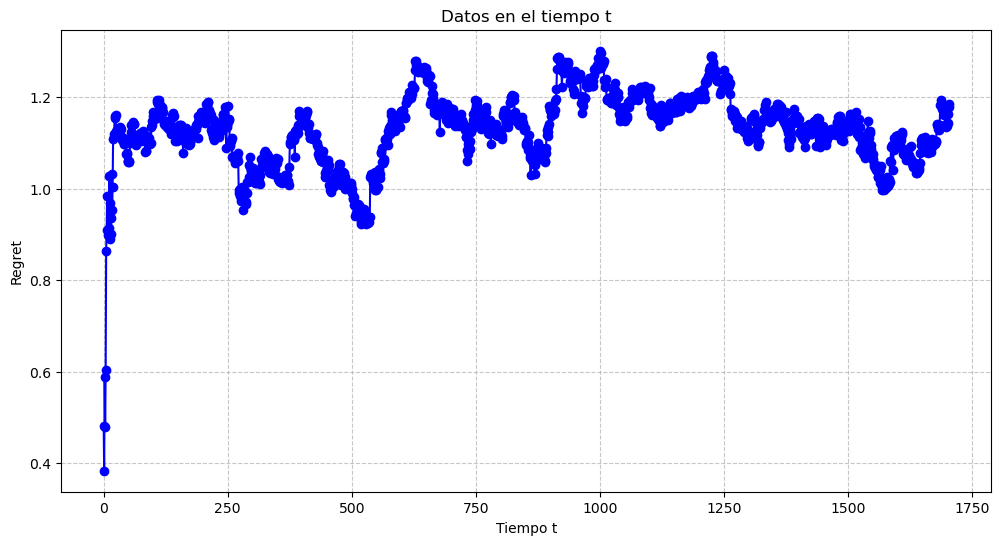

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedio)),regrets_promedio , marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

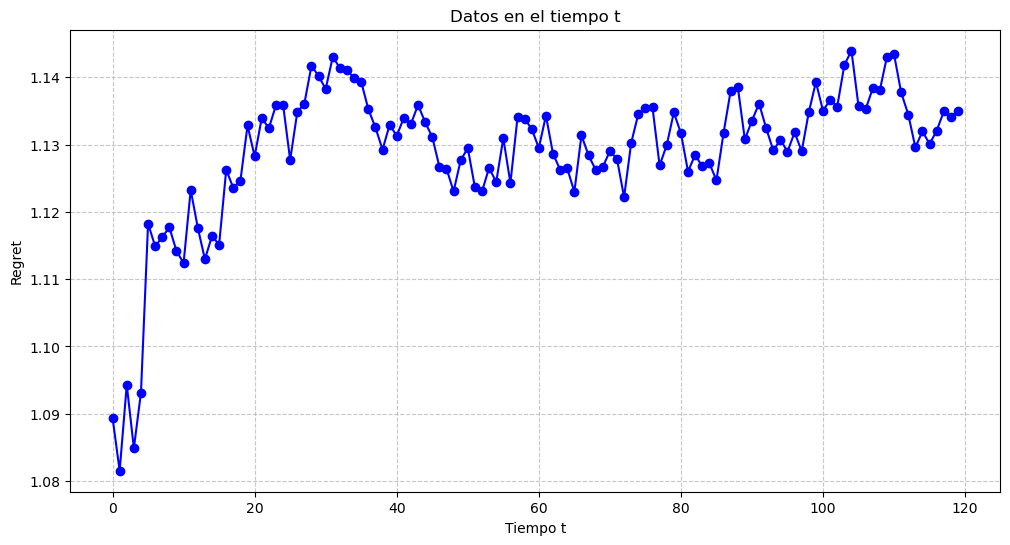

In [68]:
import matplotlib.pyplot as plt
regrets_promedios_sim = [np.mean(regrets_promedio[i::ventana-1]) for i in range(ventana-1)]
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedios_sim)), regrets_promedios_sim, marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [69]:
 df_ortogonales_verdad_l.mean()

portafolio_ortogonal_verdad1     1.740774
portafolio_ortogonal_verdad2     1.538231
portafolio_ortogonal_verdad3     1.371444
portafolio_ortogonal_verdad4     1.493188
portafolio_ortogonal_verdad5     1.419133
portafolio_ortogonal_verdad6     1.836396
portafolio_ortogonal_verdad7     1.849542
portafolio_ortogonal_verdad8     1.874467
portafolio_ortogonal_verdad9     2.024281
portafolio_ortogonal_verdad10    1.949446
portafolio_ortogonal_verdad11    2.000895
portafolio_ortogonal_verdad12    2.077952
portafolio_ortogonal_verdad13    1.945375
portafolio_ortogonal_verdad14    2.007466
portafolio_ortogonal_verdad15    2.122968
portafolio_ortogonal_verdad16    2.122283
portafolio_ortogonal_verdad17    2.085456
portafolio_ortogonal_verdad18    2.091648
portafolio_ortogonal_verdad19    2.213919
portafolio_ortogonal_verdad20    2.063547
portafolio_ortogonal_verdad21    2.383080
portafolio_ortogonal_verdad22    2.148690
dtype: float64

In [70]:
 df_ortogonales.mean()

portafolio_ortogonal_1     0.806090
portafolio_ortogonal_2     0.794802
portafolio_ortogonal_3     0.823825
portafolio_ortogonal_4     0.824975
portafolio_ortogonal_5     0.823145
portafolio_ortogonal_6     0.837095
portafolio_ortogonal_7     0.837595
portafolio_ortogonal_8     0.837697
portafolio_ortogonal_9     0.844369
portafolio_ortogonal_10    0.839900
portafolio_ortogonal_11    0.843449
portafolio_ortogonal_12    0.845751
portafolio_ortogonal_13    0.841698
portafolio_ortogonal_14    0.842831
portafolio_ortogonal_15    0.847760
portafolio_ortogonal_16    0.848308
portafolio_ortogonal_17    0.846242
portafolio_ortogonal_18    0.846379
portafolio_ortogonal_19    0.850327
portafolio_ortogonal_20    0.845018
portafolio_ortogonal_21    0.855678
portafolio_ortogonal_22    0.847898
portafolio_ortogonal_23    0.852505
portafolio_ortogonal_24    0.851006
portafolio_ortogonal_25    0.852172
portafolio_ortogonal_26    0.852092
portafolio_ortogonal_27    0.853095
portafolio_ortogonal_28    0